<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/ml/blob/master/notebooks/ml_machinelearninglandscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/ml/blob/master/notebooks/ml_machinelearninglandscape.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

# Sesión 01: Proyecto Integral de Machine Learning
## California Housing: De Datos Crudos a Modelo en Producción

**Machine Learning**

**Profesor:** Marco Terán  
**Fecha:** 2025

[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).
___

## 📋 Tabla de Contenidos

1. **Introducción y Objetivos** - Qué aprenderemos y por qué es importante
2. **Obtención de Datos** - Cómo conseguir y cargar datos
3. **Análisis Exploratorio (EDA)** - Conociendo nuestros datos a fondo
4. **Preparación de Datos** - Limpieza y transformación
5. **Modelado** - Entrenando algoritmos de ML
6. **Evaluación** - Midiendo el rendimiento honestamente
7. **Conclusiones** - Qué aprendimos y próximos pasos

---

## Introducción y Objetivos <a name="intro"></a>

### ¿Qué vamos a construir hoy?

Imagina que trabajas en una empresa inmobiliaria en California. Tu jefe te dice: "Necesitamos una forma rápida y precisa de estimar el precio de las casas. Los tasadores humanos tardan días y cobran mucho. ¿Puedes crear un sistema automático?"

**Este es exactamente el tipo de problema que Machine Learning puede resolver.**

### Objetivos de aprendizaje

Al finalizar esta sesión, serás capaz de:

1. **Aplicar CRISP-DM** - La metodología estándar para proyectos de ciencia de datos
2. **Realizar EDA exhaustivo** - Explorar datos como un detective buscando pistas
3. **Preparar datos correctamente** - Limpiar, transformar y enriquecer información
4. **Entrenar modelos de ML** - Desde los más simples hasta Random Forests
5. **Evaluar honestamente** - Sin trampas ni overfitting
6. **Crear pipelines reproducibles** - Código profesional listo para producción

### ¿Por qué es importante este proyecto?

- **Aplicación real**: Miles de empresas necesitan predecir precios (casas, autos, productos)
- **Conceptos fundamentales**: Todo lo que aprendas aquí se aplica a otros problemas
- **Buenas prácticas**: Aprenderás a evitar los errores más comunes en ML
- **Portfolio**: Este proyecto demuestra habilidades valoradas en la industria

### Lo que NO haremos (y por qué)

- **No usaremos deep learning**: Para datos tabulares, métodos clásicos suelen ser mejores
- **No optimizaremos hasta el extremo**: El 80% del valor viene del 20% del esfuerzo
- **No ignoraremos el negocio**: Un modelo preciso pero inútil no tiene valor

In [23]:
print("¡Bienvenidos al primer notebook!")

¡Bienvenidos al primer notebook!


---

## 🔧 Configuración del Entorno

### ¿Por qué importan las versiones?

En ML, la reproducibilidad es crucial. Imagina que tu modelo funciona perfectamente en tu computadora pero falla en producción. La causa más común: diferentes versiones de librerías.

**Regla de oro**: Siempre documenta y verifica las versiones de tus dependencias.

### Librerías que usaremos

- **NumPy**: El motor matemático de Python. Maneja arrays y operaciones numéricas eficientemente
- **Pandas**: Como Excel con superpoderes. Organiza datos en DataFrames (tablas)
- **Matplotlib/Seaborn**: Nuestros artistas. Crean visualizaciones profesionales
- **Scikit-learn**: La navaja suiza del ML. Contiene algoritmos, métricas y utilidades

### Configuración visual

Los defaults de matplotlib no son los más bonitos. Vamos a configurar:
- Estilo consistente para todos los gráficos
- Tamaños legibles
- Colores agradables
- Formato de números apropiado

In [24]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.11 instalado correctamente


It also requires Scikit-Learn ≥ 1.0.1:

In [25]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [26]:
# Verificar versiones de librerías críticas
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "Requiere scikit-learn >= 1.0.1"
print(f"✅ scikit-learn {sklearn.__version__} instalado")

✅ scikit-learn 1.6.1 instalado


---

## 🔄  Metodología CRISP-DM

### ¿Qué es CRISP-DM?

**CRISP-DM** (Cross-Industry Standard Process for Data Mining) es el proceso estándar que siguen las empresas para proyectos de datos. Fue creado en 1996 y sigue siendo el más usado.

### ¿Por qué necesitamos una metodología?

Sin un proceso estructurado, es fácil:
- Resolver el problema equivocado
- Olvidar pasos importantes
- Perder tiempo en callejones sin salida
- No poder replicar resultados

### Las 6 fases de CRISP-DM

#### 1️⃣ Comprensión del Negocio (Business Understanding)

**Qué hacemos**: Entender el problema REAL, no el que creemos que es.

**Preguntas clave**:
- ¿Qué decisión tomará el usuario con mi modelo?
- ¿Cuánto vale resolver este problema? (ROI)
- ¿Qué pasa si mi modelo se equivoca?
- ¿Hay soluciones más simples sin ML?

**Ejemplo malo**: "Quiero predecir precios de casas"  
**Ejemplo bueno**: "Necesito estimar precios con error < $50k para que los agentes puedan dar cotizaciones rápidas que convenzan a los vendedores de listar con nosotros"

**Trampa común**: Saltar directo al modelado sin entender el contexto.

#### 2️⃣ Comprensión de los Datos (Data Understanding)

**Qué hacemos**: Explorar qué datos tenemos y qué calidad tienen.

**Actividades**:
- Recolectar datos de diversas fuentes
- Explorar con estadísticas descriptivas
- Verificar calidad y completitud
- Identificar problemas potenciales

**Herramientas**: pandas.describe(), .info(), visualizaciones

**Trampa común**: Asumir que los datos están limpios y completos.

#### 3️⃣ Preparación de Datos (Data Preparation)

**Qué hacemos**: Transformar datos crudos en formato apto para ML.

**Tareas típicas**:
- Limpieza (valores faltantes, outliers)
- Transformación (normalización, encoding)
- Creación de features (ingeniería de características)
- Selección de features relevantes

**Regla 80/20**: Pasarás 80% del tiempo aquí, 20% modelando.

**Trampa común**: Data leakage (usar información del futuro o del conjunto de test).

#### 4️⃣ Modelado (Modeling)

**Qué hacemos**: Entrenar y ajustar algoritmos de ML.

**Proceso**:
1. Seleccionar algoritmos candidatos
2. Entrenar con datos de entrenamiento
3. Ajustar hiperparámetros
4. Validar con cross-validation

**Importante**: Más complejo ≠ Mejor. Empieza simple.

**Trampa común**: Overfitting (memorizar en lugar de aprender).

#### 5️⃣ Evaluación (Evaluation)

**Qué hacemos**: Verificar si el modelo cumple los objetivos de negocio.

**No es solo accuracy**:
- ¿Resuelve el problema de negocio?
- ¿Es lo suficientemente rápido?
- ¿Es interpretable si es necesario?
- ¿Funciona en todos los segmentos importantes?

**Trampa común**: Optimizar la métrica equivocada.

#### 6️⃣ Despliegue (Deployment)

**Qué hacemos**: Poner el modelo en producción.

**Consideraciones**:
- Integración con sistemas existentes
- Monitoreo de performance
- Plan de actualización/reentrenamiento
- Documentación y handover

**Realidad**: Un modelo que no se usa no genera valor.

### El secreto: Es ITERATIVO, no lineal

CRISP-DM no es una cascada, es un ciclo. Constantemente volvemos atrás cuando descubrimos nuevos insights.

---

## 💼 3. Comprensión del Negocio

### El problema de California Housing Corp

**Contexto**: Es 1990. California Housing Corp maneja miles de propiedades. Los tasadores están sobrecargados y los clientes se quejan de la lentitud.

**Problema actual**:
- Tasación manual toma 2-3 días
- Costo: $500 por tasación
- Inconsistencia entre tasadores (subjetividad)
- Cuellos de botella en temporada alta

**Solución propuesta**: Sistema automático de predicción de precios

### Definiendo el éxito

* **Métrica de negocio**: Reducir tiempo de respuesta de 3 días a 3 segundos

* **Métrica técnica**: Error Absoluto Medio (MAE) < $50,000

* **¿Por qué $50,000?**
    - Precio medio en California: ~200,000
    - Error del 25% es aceptable para cotización inicial
    - Tasadores humanos tienen error similar

### Preguntas críticas antes de empezar

**1. ¿Realmente necesitamos ML?**
- Alternativa 1: Precio promedio del barrio → Muy impreciso
- Alternativa 2: Reglas simples → No captura complejidad
- Conclusión: Sí, ML es apropiado

**2. ¿Qué pasa si el modelo falla?**
- Plan B: Siempre tener tasador de respaldo
- Transparencia: Decir que es estimación automática
- Rangos: Dar intervalo de confianza, no solo un número

**3. ¿Cómo mediremos el impacto?**
- Velocidad de respuesta a clientes
- Tasa de conversión (cotización → venta)
- Satisfacción del cliente
- Ahorro en costos de tasación

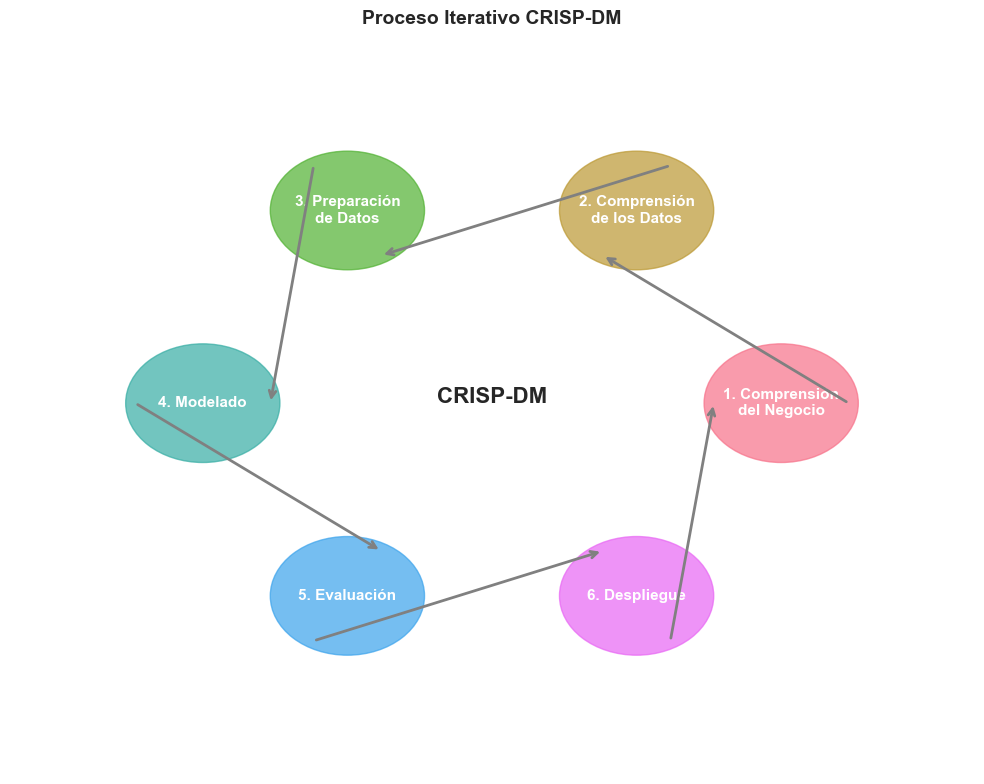

In [27]:
# Visualización del proceso CRISP-DM
from IPython.display import Image, display
import matplotlib.patches as mpatches

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Definir las fases
phases = [
    "1. Comprensión\ndel Negocio",
    "2. Comprensión\nde los Datos", 
    "3. Preparación\nde Datos",
    "4. Modelado",
    "5. Evaluación",
    "6. Despliegue"
]

# Posiciones en círculo
angles = np.linspace(0, 2*np.pi, len(phases), endpoint=False)
x = np.cos(angles)
y = np.sin(angles)

# Dibujar el ciclo
for i in range(len(phases)):
    circle = plt.Circle((x[i]*3, y[i]*3), 0.8, color=f'C{i}', alpha=0.7)
    ax.add_patch(circle)
    ax.text(x[i]*3, y[i]*3, phases[i], ha='center', va='center', 
            fontsize=11, fontweight='bold', color='white')
    
    # Flechas de conexión
    next_i = (i + 1) % len(phases)
    ax.annotate('', xy=(x[next_i]*2.3, y[next_i]*2.3), 
                xytext=(x[i]*3.7, y[i]*3.7),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

ax.text(0, 0, 'CRISP-DM', fontsize=16, fontweight='bold', ha='center')
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('off')
plt.title("Proceso Iterativo CRISP-DM", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---

## Obtención y Comprensión de Datos <a name="datos"></a>

### El dataset de California Housing

**Origen**: Censo de California de 1990
**Tamaño**: 20,640 distritos
**Granularidad**: Cada fila es un distrito, no una casa individual

### ¿Por qué este dataset?

- **Clásico en ML**: Bien estudiado, podemos comparar resultados
- **Tamaño apropiado**: Ni muy pequeño ni muy grande para aprender
- **Problemas reales**: Tiene valores faltantes y peculiaridades
- **Múltiples tipos de datos**: Numéricos y categóricos

### Estrategia de descarga robusta

Implementaremos:
1. **Caché local**: Si ya descargamos, no repetir
2. **Manejo de errores**: Si falla la descarga, informar claramente
3. **Estructura organizada**: Carpeta datasets/ para todos los datos

### Descarga y Carga de Datos

In [28]:
# Función mejorada para descargar datos
def load_housing_data():
    """
    Descarga y carga el dataset de California Housing.
    Incluye manejo de errores y caché local.
    """
    import tarfile
    import urllib.request
    
    # Crear directorio si no existe
    data_path = Path("datasets")
    data_path.mkdir(parents=True, exist_ok=True)
    
    tarball_path = data_path / "housing.tgz"
    csv_path = data_path / "housing" / "housing.csv"
    
    # Verificar si ya existe el CSV
    if csv_path.is_file():
        print("📁 Cargando datos desde caché local...")
        return pd.read_csv(csv_path)
    
    # Descargar si no existe
    if not tarball_path.is_file():
        print("📥 Descargando dataset...")
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        try:
            urllib.request.urlretrieve(url, tarball_path)
            print("✅ Descarga completada")
        except Exception as e:
            print(f"❌ Error en descarga: {e}")
            return None
    
    # Extraer archivo
    print("📦 Extrayendo archivos...")
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path=data_path)
    
    print("✅ Datos cargados exitosamente")
    return pd.read_csv(csv_path)

# Cargar datos
housing = load_housing_data()
print(f"\n📊 Dataset cargado: {housing.shape[0]:,} filas × {housing.shape[1]} columnas")

# For Kaggle environment
#housing = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")

📁 Cargando datos desde caché local...

📊 Dataset cargado: 20,640 filas × 10 columnas


## 🔍 Análisis Exploratorio de Datos (EDA)

### ¿Qué es EDA y por qué es crucial?

**EDA es como ser un detective**: Buscas pistas, anomalías y patrones en los datos.

**John Tukey** (inventor del EDA) dijo: "Es mejor una respuesta aproximada a la pregunta correcta que una respuesta exacta a la pregunta incorrecta."

### Primera impresión: Vista rápida

**¿Qué buscamos?**
- Tipos de datos (numéricos, texto, fechas)
- Dimensiones (filas × columnas)
- Valores faltantes obvios
- Rangos sospechosos

**Herramientas**: head(), info(), describe()

### Primera Inspección de Datos

In [29]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con formato mejorado
display(housing.head().style.background_gradient(cmap='coolwarm', subset=['median_house_value']))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
housing.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(housing.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY



                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB

                           ESTADÍSTICAS DESCRIPTIVAS                            


,count,mean,std,min,25%,50%,75%,max
longitude,20640.00,-119.57,2.00,-124.35,-121.80,-118.49,-118.01,-114.31
latitude,20640.00,35.63,2.14,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.00,28.64,12.59,1.00,18.00,29.00,37.00,52.00
total_rooms,20640.00,2635.76,2181.62,2.00,1447.75,2127.00,3148.00,39320.00
total_bedrooms,20433.00,537.87,421.39,1.00,296.00,435.00,647.00,6445.00
population,20640.00,1425.48,1132.46,3.00,787.00,1166.00,1725.00,35682.00
households,20640.00,499.54,382.33,1.00,280.00,409.00,605.00,6082.00
median_income,20640.00,3.87,1.90,0.50,2.56,3.53,4.74,15.00
median_house_value,20640.00,206855.82,115395.62,14999.00,119600.00,179700.00,264725.00,500001.00


### Descripción de Variables

### Entendiendo cada variable

**Variables geográficas**:
- `longitude`, `latitude`: Coordenadas GPS
- Nos permiten visualizar en mapa
- Pueden revelar patrones espaciales (precios por zona)

**Variables demográficas**:
- `population`: Total de personas en el distrito
- `households`: Número de hogares (familias)
- `total_rooms`, `total_bedrooms`: Infraestructura habitacional

**Variables económicas**:
- `median_income`: Ingreso mediano (en decenas de miles)
- `median_house_value`: **NUESTRA VARIABLE OBJETIVO**

**Variable temporal**:
- `housing_median_age`: Edad de las construcciones

**Variable categórica**:
- `ocean_proximity`: Relación con el océano

In [30]:
# Diccionario de metadatos
metadata = {
    'Variable': ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                 'total_bedrooms', 'population', 'households', 'median_income', 
                 'median_house_value', 'ocean_proximity'],
    'Tipo': ['Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica', 
             'Numérica', 'Numérica', 'Numérica', 'Numérica (Target)', 'Categórica'],
    'Descripción': [
        'Longitud geográfica (más oeste = mayor valor)',
        'Latitud geográfica (más norte = mayor valor)',
        'Edad mediana de las casas en el distrito (años)',
        'Número total de habitaciones en el distrito',
        'Número total de dormitorios en el distrito',
        'Población total del distrito',
        'Número total de hogares en el distrito',
        'Ingreso mediano de los hogares (×$10,000)',
        '🎯 Valor mediano de las casas (USD)',
        'Proximidad al océano'
    ],
    'Valores Faltantes': [
        housing['longitude'].isnull().sum(),
        housing['latitude'].isnull().sum(),
        housing['housing_median_age'].isnull().sum(),
        housing['total_rooms'].isnull().sum(),
        housing['total_bedrooms'].isnull().sum(),
        housing['population'].isnull().sum(),
        housing['households'].isnull().sum(),
        housing['median_income'].isnull().sum(),
        housing['median_house_value'].isnull().sum(),
        housing['ocean_proximity'].isnull().sum()
    ]
}

df_metadata = pd.DataFrame(metadata)
display(df_metadata.style.applymap(
    lambda x: 'background-color: #ffcccc' if x > 0 else '',
    subset=['Valores Faltantes']
))

,Variable,Tipo,Descripción,Valores Faltantes
0,longitude,Numérica,Longitud geográfica (más oeste = mayor valor),0
1,latitude,Numérica,Latitud geográfica (más norte = mayor valor),0
2,housing_median_age,Numérica,Edad mediana de las casas en el distrito (años),0
3,total_rooms,Numérica,Número total de habitaciones en el distrito,0
4,total_bedrooms,Numérica,Número total de dormitorios en el distrito,207
5,population,Numérica,Población total del distrito,0
6,households,Numérica,Número total de hogares en el distrito,0
7,median_income,Numérica,"Ingreso mediano de los hogares (×$10,000)",0
8,median_house_value,Numérica (Target),🎯 Valor mediano de las casas (USD),0
9,ocean_proximity,Categórica,Proximidad al océano,0


---
### Detectando problemas en los datos

#### Análisis de Valores Faltantes (Missing values)

**¿Por qué faltan datos?**
- No se recopiló (olvido, opcional)
- Error en recopilación
- No aplica (ej: "número de hijos" para solteros)

**Estrategias**:
1. **Eliminar filas**: Si son pocas (<5%)
2. **Eliminar columna**: Si falta mucho (>60%)
3. **Imputar**: Rellenar con media/mediana/moda
4. **Indicador**: Crear variable "era_faltante"

**En nuestro caso**: total_bedrooms falta en 207 distritos (1%)

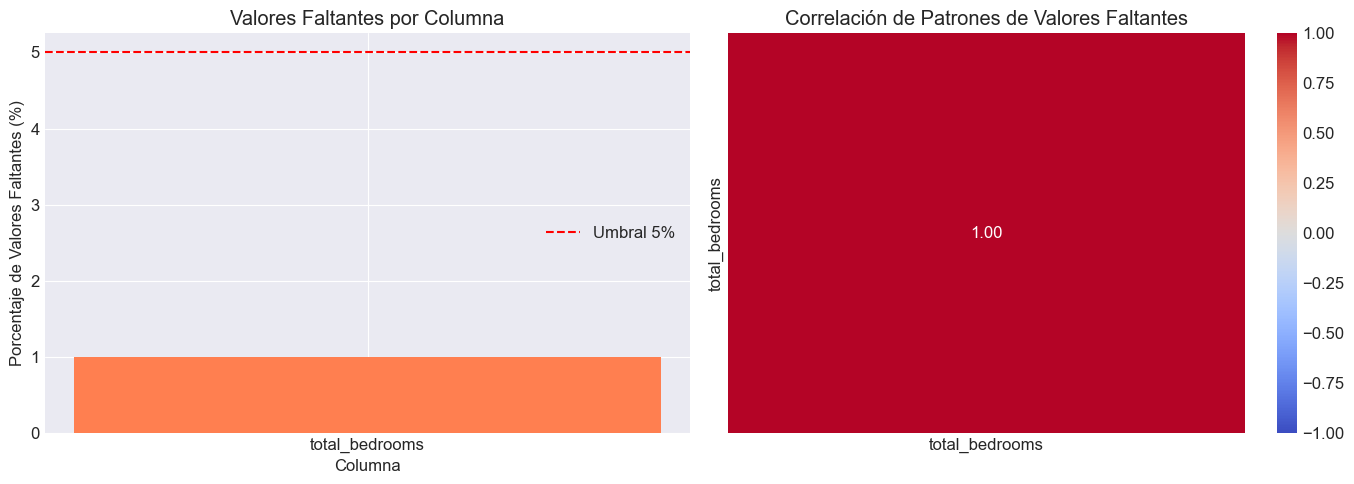

,Columna,Valores_Faltantes,Porcentaje,Tipo_Dato
total_bedrooms,total_bedrooms,207,1.00,float64


In [31]:
# Análisis detallado de valores faltantes
def analyze_missing_values(df):
    """Análisis completo de valores faltantes"""
    missing_df = pd.DataFrame({
        'Columna': df.columns,
        'Valores_Faltantes': df.isnull().sum(),
        'Porcentaje': (df.isnull().sum() / len(df)) * 100,
        'Tipo_Dato': df.dtypes
    })
    
    missing_df = missing_df[missing_df['Valores_Faltantes'] > 0].sort_values(
        'Porcentaje', ascending=False
    )
    
    if len(missing_df) > 0:
        # Visualización
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Gráfico de barras
        ax1.bar(missing_df['Columna'], missing_df['Porcentaje'], color='coral')
        ax1.set_xlabel('Columna')
        ax1.set_ylabel('Porcentaje de Valores Faltantes (%)')
        ax1.set_title('Valores Faltantes por Columna')
        ax1.axhline(y=5, color='r', linestyle='--', label='Umbral 5%')
        ax1.legend()
        
        # Heatmap de patrones
        import seaborn as sns
        msno_data = df[missing_df['Columna'].tolist()].isnull().astype(int)
        sns.heatmap(msno_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', 
                   ax=ax2, vmin=-1, vmax=1)
        ax2.set_title('Correlación de Patrones de Valores Faltantes')
        
        plt.tight_layout()
        plt.show()
        
        return missing_df
    else:
        print("✅ No hay valores faltantes en el dataset")
        return None

missing_analysis = analyze_missing_values(housing)
if missing_analysis is not None:
    display(missing_analysis)

### Estadísticas descriptivas: Los números cuentan historias

**¿Qué nos dicen las estadísticas?**

**Media vs Mediana**:
- Si media > mediana: Sesgo a la derecha (valores extremos altos)
- Si media < mediana: Sesgo a la izquierda (valores extremos bajos)
- Si media ≈ mediana: Distribución simétrica

**Desviación estándar**:
- Alta: Mucha variabilidad (cuidado con outliers)
- Baja: Datos concentrados (posible poca información)

**Min/Max sospechosos**:
- Edad máxima = 52: ¿Censura de datos?
- Precio máximo = $500,001: Definitivamente censura

### Análisis Univariado

**¿Qué buscamos en un histograma?**

1. **Forma de campana** (normal): Ideal para muchos algoritmos
2. **Sesgo** (cola larga): Considerar transformación logarítmica
3. **Bimodal** (dos jorobas): Posibles subgrupos diferentes
4. **Uniforme** (plano): Poca información predictiva
5. **Picos extraños**: Valores artificiales o errores

**Ejemplo**: median_house_value tiene pico en $500k → Censura de datos


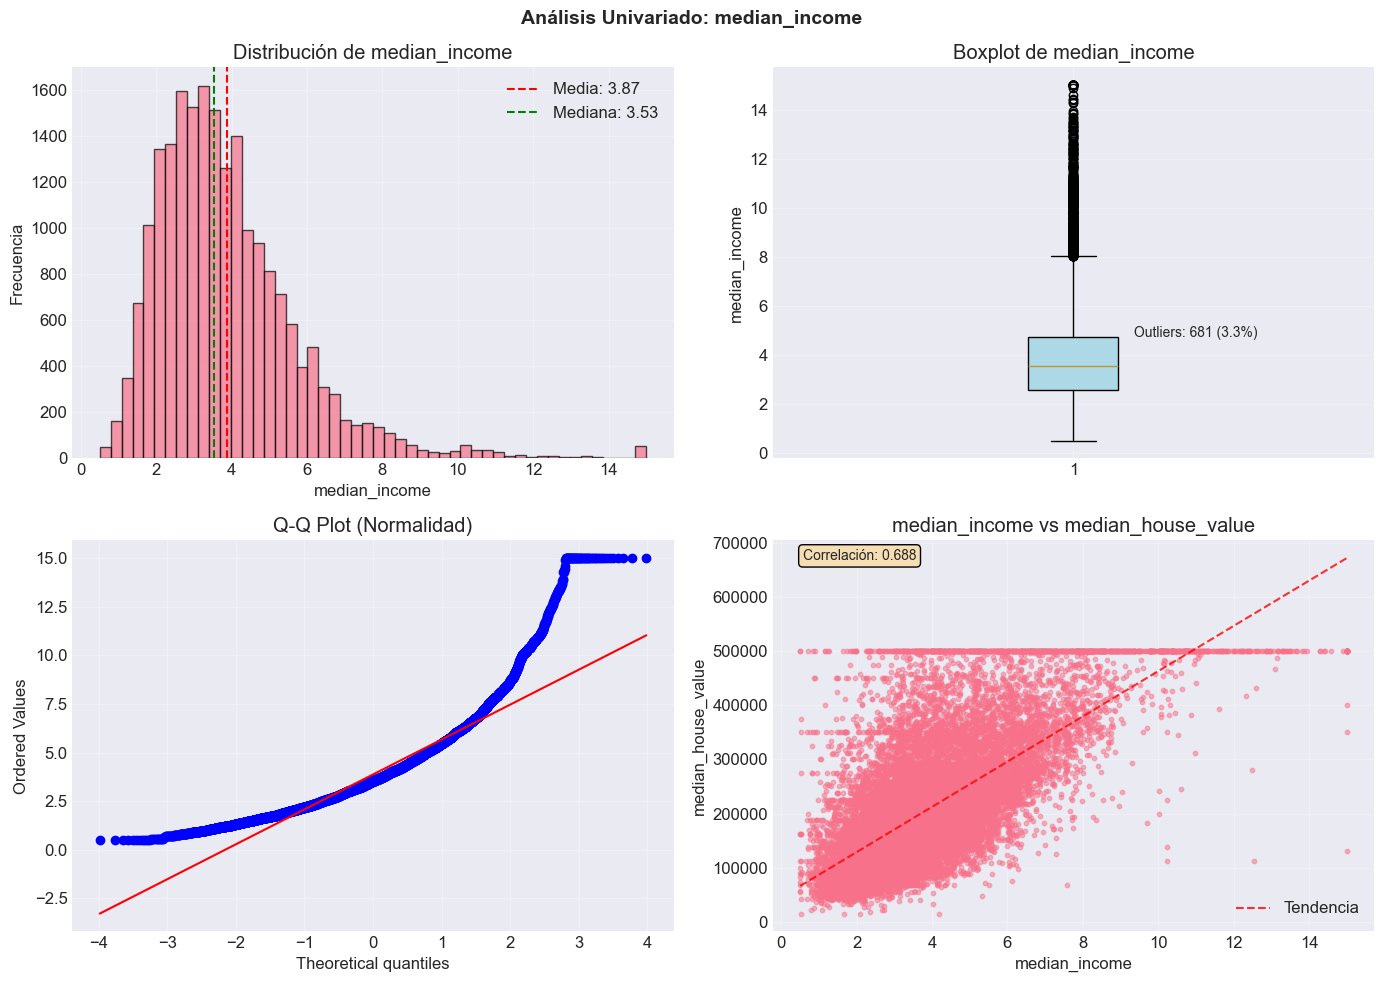

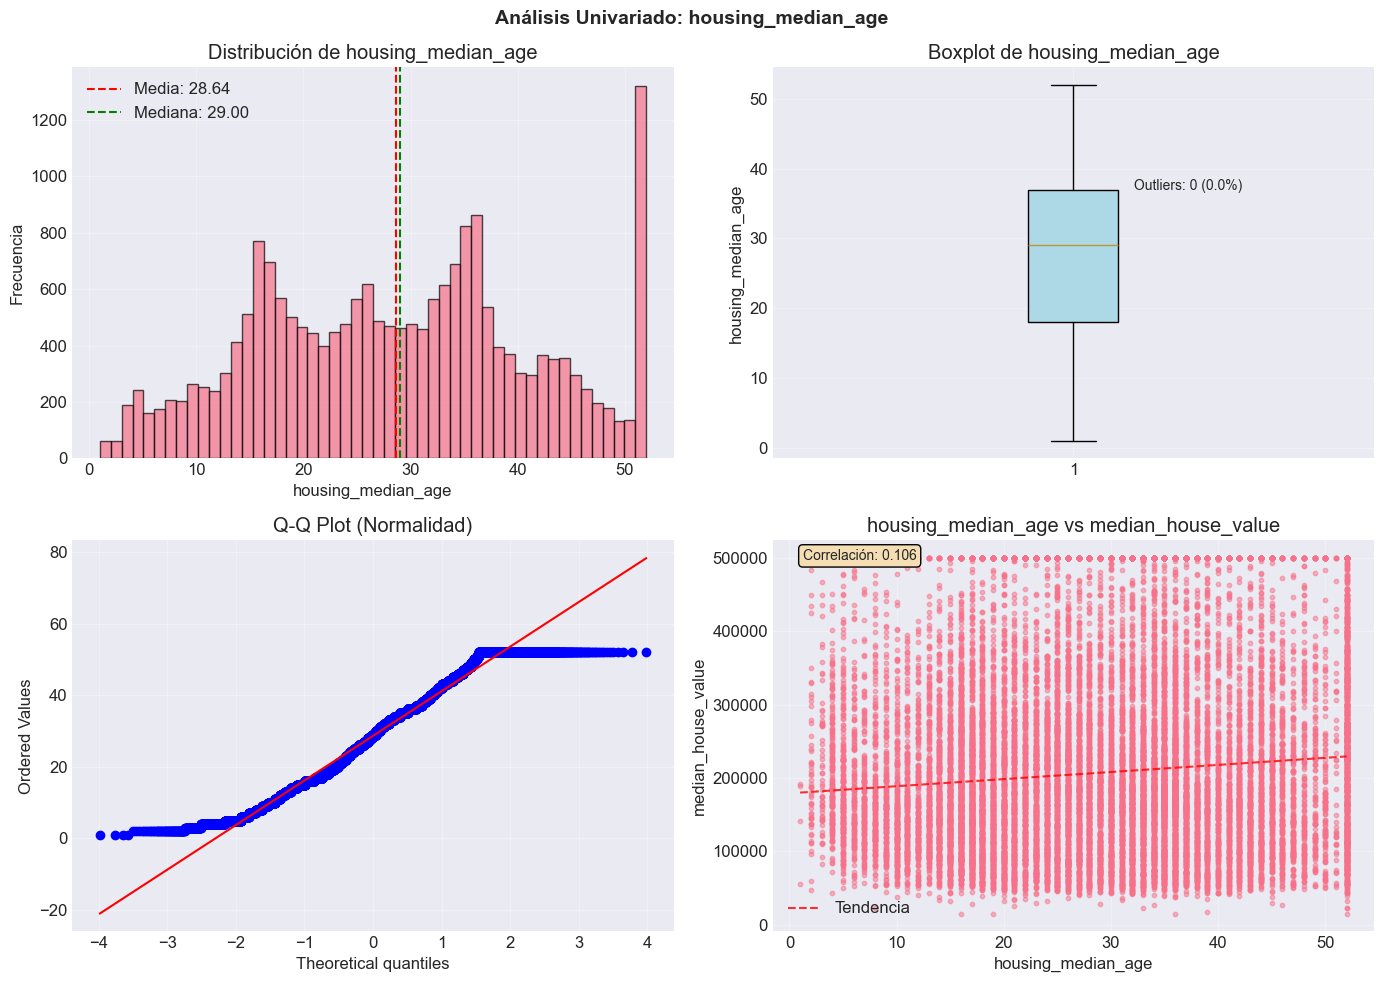

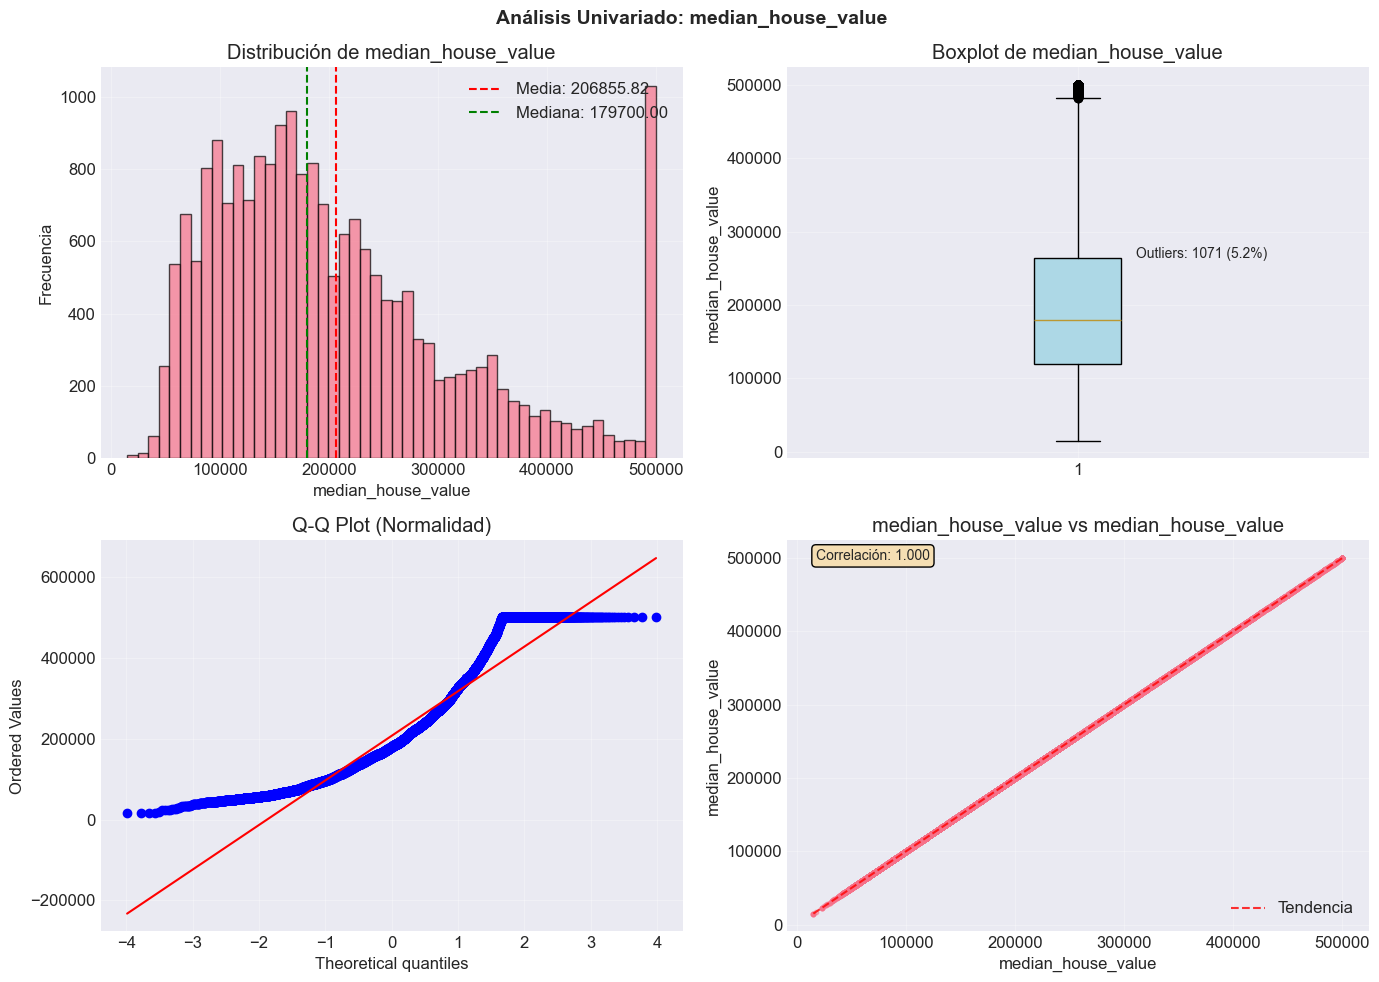

In [32]:
# Función para análisis univariado robusto
def univariate_analysis(df, column, target=None):
    """Análisis univariado con estadísticas robustas"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Histograma con KDE
    ax1 = axes[0, 0]
    df[column].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax1)
    ax1.axvline(df[column].mean(), color='red', linestyle='--', label=f'Media: {df[column].mean():.2f}')
    ax1.axvline(df[column].median(), color='green', linestyle='--', label=f'Mediana: {df[column].median():.2f}')
    ax1.set_title(f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Boxplot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(df[column].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'Boxplot de {column}')
    ax2.set_ylabel(column)
    ax2.grid(alpha=0.3)
    
    # Detectar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    ax2.text(1.1, Q3, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)', 
             fontsize=10)
    
    # 3. Q-Q Plot
    ax3 = axes[1, 0]
    from scipy import stats
    stats.probplot(df[column].dropna(), dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(alpha=0.3)
    
    # 4. Relación con target (si existe)
    ax4 = axes[1, 1]
    if target is not None and target in df.columns:
        ax4.scatter(df[column], df[target], alpha=0.5, s=10)
        ax4.set_xlabel(column)
        ax4.set_ylabel(target)
        ax4.set_title(f'{column} vs {target}')
        
        # Agregar línea de tendencia
        z = np.polyfit(df[column].dropna(), df[target][df[column].notna()], 1)
        p = np.poly1d(z)
        ax4.plot(df[column].sort_values(), p(df[column].sort_values()), 
                "r--", alpha=0.8, label=f'Tendencia')
        
        # Calcular correlación
        corr = df[column].corr(df[target])
        ax4.text(0.05, 0.95, f'Correlación: {corr:.3f}', 
                transform=ax4.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
        ax4.legend()
    else:
        # Estadísticas adicionales
        ax4.axis('off')
        stats_text = f"""
        Estadísticas Robustas:
        
        • Media: {df[column].mean():.2f}
        • Mediana: {df[column].median():.2f}
        • Desv. Estándar: {df[column].std():.2f}
        • MAD: {stats.median_abs_deviation(df[column].dropna()):.2f}
        • Asimetría: {df[column].skew():.2f}
        • Curtosis: {df[column].kurtosis():.2f}
        • Rango: [{df[column].min():.2f}, {df[column].max():.2f}]
        • IQR: {IQR:.2f}
        • CV: {df[column].std()/df[column].mean():.2f}
        """
        ax4.text(0.1, 0.5, stats_text, transform=ax4.transAxes, 
                fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
    
    ax4.grid(alpha=0.3)
    
    plt.suptitle(f'Análisis Univariado: {column}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analizar variables numéricas clave
for col in ['median_income', 'housing_median_age', 'median_house_value']:
    univariate_analysis(housing, col, 'median_house_value')

### Análisis de Variable Categórica

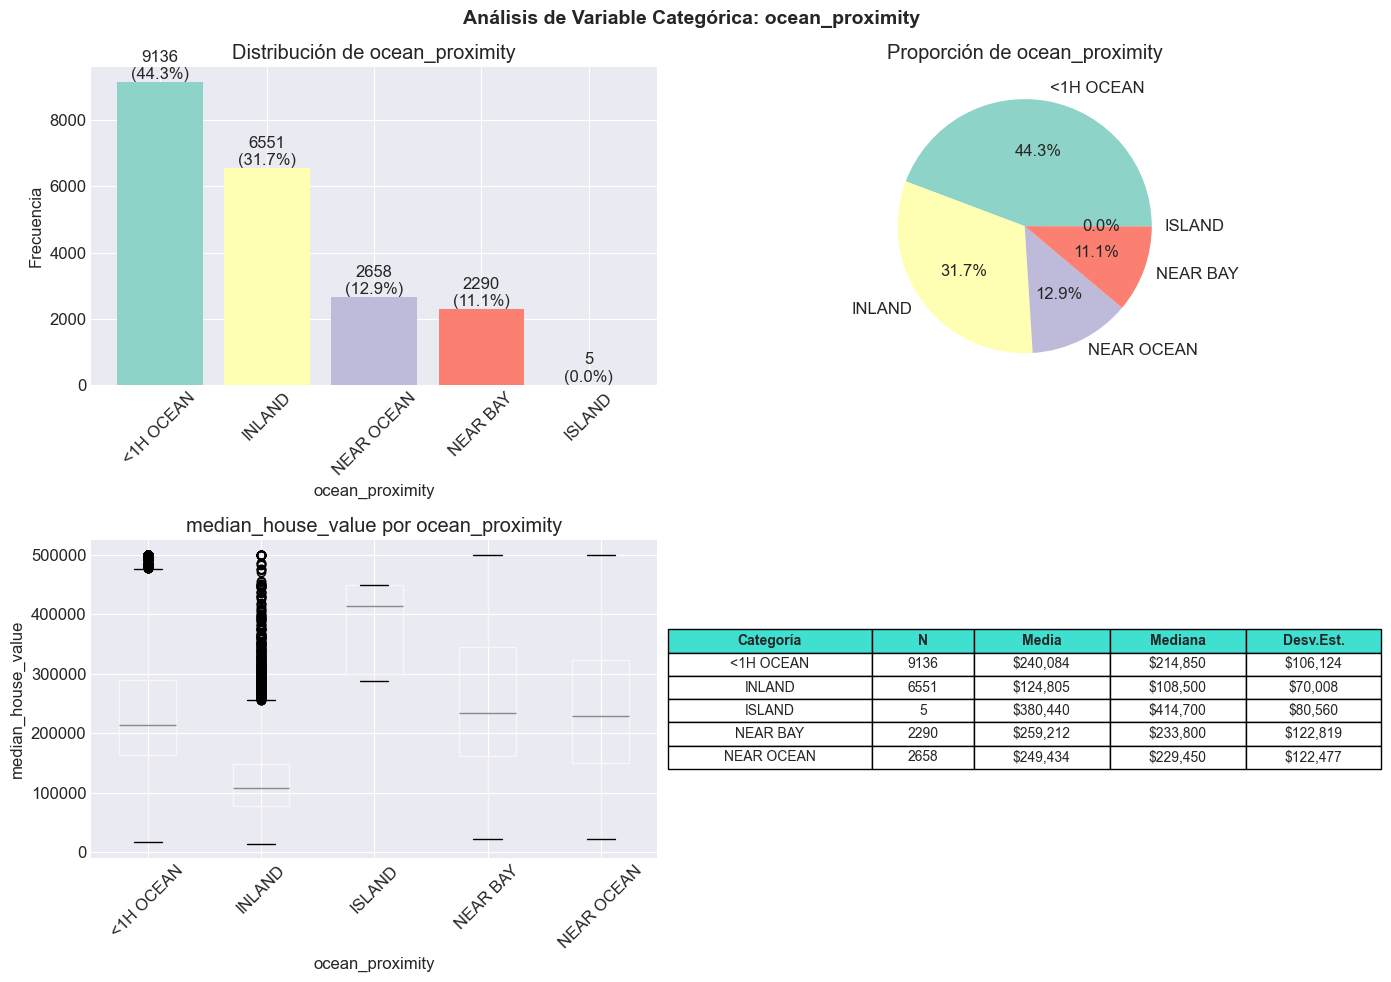

In [33]:
# Análisis de ocean_proximity
def analyze_categorical(df, cat_col, target_col):
    """Análisis completo de variable categórica"""
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Distribución de categorías
    ax1 = axes[0, 0]
    counts = df[cat_col].value_counts()
    ax1.bar(counts.index, counts.values, color=plt.cm.Set3(range(len(counts))))
    ax1.set_title(f'Distribución de {cat_col}')
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)
    
    # Agregar porcentajes
    for i, (idx, val) in enumerate(counts.items()):
        ax1.text(i, val, f'{val}\n({val/len(df)*100:.1f}%)', 
                ha='center', va='bottom')
    
    # 2. Pie chart
    ax2 = axes[0, 1]
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(range(len(counts))))
    ax2.set_title(f'Proporción de {cat_col}')
    
    # 3. Boxplot por categoría
    ax3 = axes[1, 0]
    df.boxplot(column=target_col, by=cat_col, ax=ax3)
    ax3.set_title(f'{target_col} por {cat_col}')
    ax3.set_xlabel(cat_col)
    ax3.set_ylabel(target_col)
    plt.sca(ax3)
    plt.xticks(rotation=45)
    
    # 4. Estadísticas por categoría
    ax4 = axes[1, 1]
    ax4.axis('off')
    
    stats_by_cat = df.groupby(cat_col)[target_col].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)
    
    table_data = []
    for idx, row in stats_by_cat.iterrows():
        table_data.append([idx, f"{row['count']:.0f}", 
                          f"${row['mean']:,.0f}", 
                          f"${row['median']:,.0f}",
                          f"${row['std']:,.0f}"])
    
    table = ax4.table(cellText=table_data,
                     colLabels=['Categoría', 'N', 'Media', 'Mediana', 'Desv.Est.'],
                     cellLoc='center',
                     loc='center',
                     colWidths=[0.3, 0.15, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)
    
    # Colorear encabezados
    for i in range(5):
        table[(0, i)].set_facecolor('#40E0D0')
        table[(0, i)].set_text_props(weight='bold')
    
    plt.suptitle(f'Análisis de Variable Categórica: {cat_col}', 
                fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_categorical(housing, 'ocean_proximity', 'median_house_value')

### Análisis Geoespacial

**Mapas geográficos:** Location, location, location

**¿Por qué graficar geográficamente?**
- Precios inmobiliarios son altamente locales
- Revelamos clusters (Silicon Valley, LA, San Diego)
- Detectamos anomalías geográficas

**Técnicas**:
- Scatter plot simple: Ver forma de California
- Color por precio: Zonas caras vs baratas
- Tamaño por población: Densidad urbana


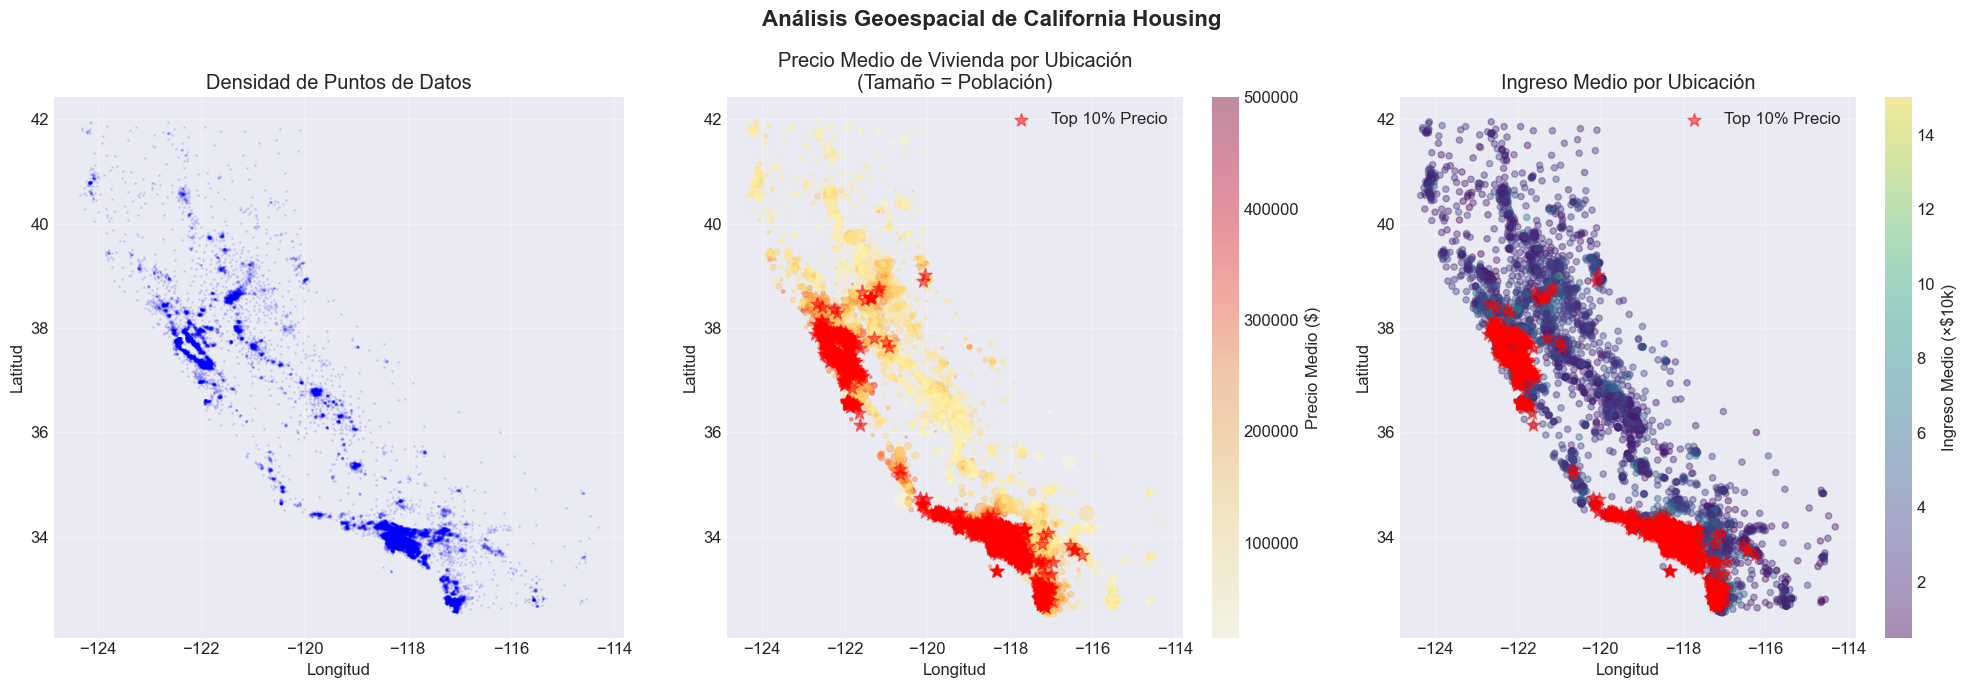


📍 Estadísticas por Proximidad al Océano:


median_house_value                     median_income  \
                              mean    median       std          mean   
ocean_proximity                                                        
<1H OCEAN                240084.29 214850.00 106124.29          4.23   
INLAND                   124805.39 108500.00  70007.91          3.21   
ISLAND                   380440.00 414700.00  80559.56          2.74   
NEAR BAY                 259212.31 233800.00 122818.54          4.17   
NEAR OCEAN               249433.98 229450.00 122477.15          4.01   

                 population  
                        sum  
ocean_proximity              
<1H OCEAN       13889374.00  
INLAND           9112744.00  
ISLAND              3340.00  
NEAR BAY         2817427.00  
NEAR OCEAN       3598955.00

In [34]:
# Visualización geográfica mejorada
def plot_geographical_data(df):
    """Visualización geográfica de California con precios"""
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 7))
    
    # 1. Mapa de densidad
    ax1 = axes[0]
    ax1.scatter(df['longitude'], df['latitude'], alpha=0.1, s=1, c='blue')
    ax1.set_xlabel('Longitud')
    ax1.set_ylabel('Latitud')
    ax1.set_title('Densidad de Puntos de Datos')
    ax1.grid(True, alpha=0.3)
    
    # 2. Mapa de precios
    ax2 = axes[1]
    scatter = ax2.scatter(df['longitude'], df['latitude'], 
                         c=df['median_house_value'], cmap='YlOrRd',
                         s=df['population']/100, alpha=0.4)
    ax2.set_xlabel('Longitud')
    ax2.set_ylabel('Latitud')
    ax2.set_title('Precio Medio de Vivienda por Ubicación\n(Tamaño = Población)')
    plt.colorbar(scatter, ax=ax2, label='Precio Medio ($)')
    ax2.grid(True, alpha=0.3)
    
    # 3. Mapa de ingresos
    ax3 = axes[2]
    scatter2 = ax3.scatter(df['longitude'], df['latitude'],
                          c=df['median_income'], cmap='viridis',
                          s=20, alpha=0.4)
    ax3.set_xlabel('Longitud')
    ax3.set_ylabel('Latitud')
    ax3.set_title('Ingreso Medio por Ubicación')
    plt.colorbar(scatter2, ax=ax3, label='Ingreso Medio (×$10k)')
    ax3.grid(True, alpha=0.3)
    
    # Identificar zonas de alto valor
    high_value = df[df['median_house_value'] > df['median_house_value'].quantile(0.9)]
    for ax in axes[1:]:
        ax.scatter(high_value['longitude'], high_value['latitude'],
                  color='red', s=100, alpha=0.5, marker='*',
                  label='Top 10% Precio')
        ax.legend()
    
    plt.suptitle('Análisis Geoespacial de California Housing', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Estadísticas por región
    print("\n📍 Estadísticas por Proximidad al Océano:")
    print("=" * 60)
    stats = df.groupby('ocean_proximity').agg({
        'median_house_value': ['mean', 'median', 'std'],
        'median_income': 'mean',
        'population': 'sum'
    }).round(2)
    display(stats)

plot_geographical_data(housing)

#### Matriz de correlación: Relaciones entre variables

**Correlación de Pearson**:
- Mide relación **lineal** entre variables
- Rango: [-1, +1]
- 0 = Sin relación lineal (¡pero puede haber no-lineal!)

**Interpretación**:
- |r| < 0.1: Muy débil
- 0.1 ≤ |r| < 0.3: Débil
- 0.3 ≤ |r| < 0.5: Moderada
- 0.5 ≤ |r| < 0.7: Fuerte
- |r| ≥ 0.7: Muy fuerte

**Cuidado**: Correlación ≠ Causalidad

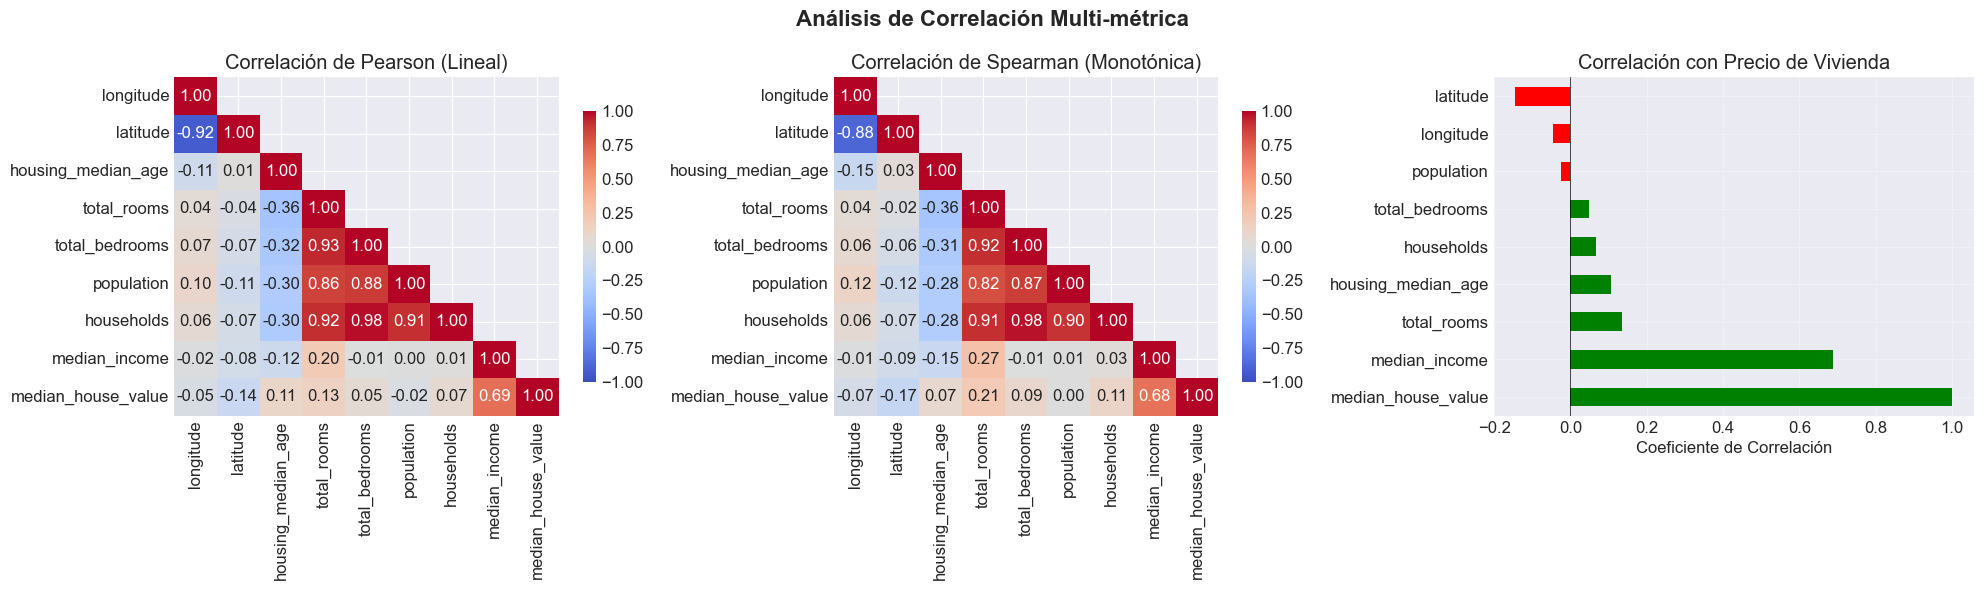


🔗 Correlaciones Significativas con el Precio:
  • median_income       : +0.688 (Fuerte Positiva)
  • total_rooms         : +0.134 (Débil Positiva)
  • housing_median_age  : +0.106 (Débil Positiva)
  • latitude            : -0.144 (Débil Negativa)


In [35]:
# Análisis de correlación mejorado
def correlation_analysis(df):
    """Análisis de correlación con múltiples métricas"""
    
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # 1. Correlación de Pearson
    corr_pearson = df[numeric_cols].corr(method='pearson')
    mask = np.triu(np.ones_like(corr_pearson), k=1)
    sns.heatmap(corr_pearson, mask=mask, annot=True, fmt='.2f', 
               cmap='coolwarm', center=0, ax=axes[0],
               vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
    axes[0].set_title('Correlación de Pearson (Lineal)')
    
    # 2. Correlación de Spearman  
    corr_spearman = df[numeric_cols].corr(method='spearman')
    sns.heatmap(corr_spearman, mask=mask, annot=True, fmt='.2f',
               cmap='coolwarm', center=0, ax=axes[1],
               vmin=-1, vmax=1, cbar_kws={"shrink": 0.8})
    axes[1].set_title('Correlación de Spearman (Monotónica)')
    
    # 3. Correlación con variable objetivo
    target_corr = df[numeric_cols].corr()['median_house_value'].sort_values(ascending=False)
    colors = ['green' if x > 0 else 'red' for x in target_corr.values]
    target_corr.plot(kind='barh', ax=axes[2], color=colors)
    axes[2].set_title('Correlación con Precio de Vivienda')
    axes[2].set_xlabel('Coeficiente de Correlación')
    axes[2].axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    axes[2].grid(True, alpha=0.3)
    
    plt.suptitle('Análisis de Correlación Multi-métrica', 
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Tabla de correlaciones importantes
    print("\n🔗 Correlaciones Significativas con el Precio:")
    print("=" * 50)
    significant_corr = target_corr[abs(target_corr) > 0.1].drop('median_house_value')
    for var, corr in significant_corr.items():
        strength = "Fuerte" if abs(corr) > 0.5 else "Moderada" if abs(corr) > 0.3 else "Débil"
        direction = "Positiva" if corr > 0 else "Negativa"
        print(f"  • {var:20s}: {corr:+.3f} ({strength} {direction})")

correlation_analysis(housing)

### Detección de Anomalías y Outliers

**Outliers:** ¿Errores o información valiosa?

**Tipos de outliers**:
1. **Errores**: Edad = 999 años → Eliminar
2. **Casos raros pero válidos**: Mansión de $50M → Mantener
3. **Diferentes poblaciones**: Empresa en zona residencial → Investigar

**Métodos de detección**:
- **IQR**: Fuera de Q1-1.5×IQR o Q3+1.5×IQR
- **Z-score**: |z| > 3
- **Isolation Forest**: Algoritmo de ML para anomalías

#### Distribuciones problemáticas

**Alta asimetría (skewness)**:
- Problema: Muchos algoritmos asumen normalidad
- Solución: Transformación log, sqrt o Box-Cox

**Alta curtosis**:
- Problema: Colas pesadas, muchos outliers
- Solución: Winsorization (cap de valores extremos)

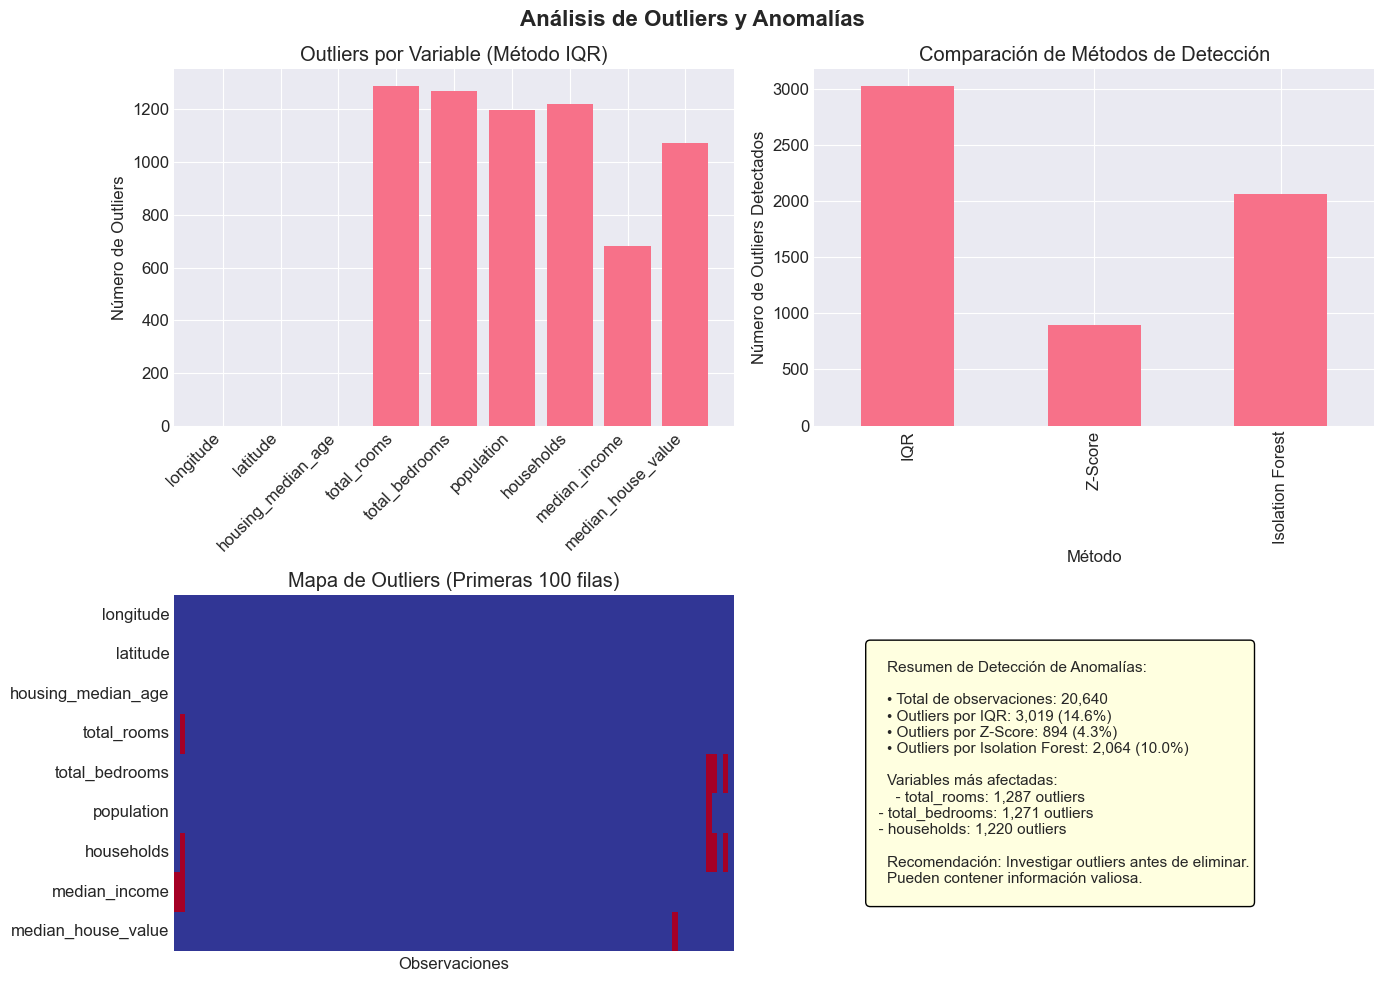

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

def detect_outliers(df):
    """Detección de outliers usando múltiples métodos"""
    
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Método 1: IQR
    outliers_iqr = pd.DataFrame()
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((numeric_df[col] < Q1 - 1.5 * IQR) | 
                   (numeric_df[col] > Q3 + 1.5 * IQR))
        outliers_iqr[col] = outliers
    
    # Método 2: Z-Score
    from scipy import stats
    z_scores = np.abs(stats.zscore(numeric_df.fillna(numeric_df.median())))
    outliers_zscore = (z_scores > 3)
    
    # Método 3: Isolation Forest
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_df.fillna(numeric_df.median()))
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    outliers_iso = iso_forest.fit_predict(scaled_data) == -1
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Outliers por columna (IQR)
    ax1 = axes[0, 0]
    outlier_counts = outliers_iqr.sum()
    ax1.bar(range(len(outlier_counts)), outlier_counts.values)
    ax1.set_xticks(range(len(outlier_counts)))
    ax1.set_xticklabels(outlier_counts.index, rotation=45, ha='right')
    ax1.set_title('Outliers por Variable (Método IQR)')
    ax1.set_ylabel('Número de Outliers')
    
    # Plot 2: Distribución de outliers por método
    ax2 = axes[0, 1]
    methods_comparison = pd.DataFrame({
        'IQR': outliers_iqr.any(axis=1).sum(),
        'Z-Score': outliers_zscore.any(axis=1).sum(),
        'Isolation Forest': outliers_iso.sum()
    }, index=['Outliers'])
    methods_comparison.T.plot(kind='bar', ax=ax2, legend=False)
    ax2.set_title('Comparación de Métodos de Detección')
    ax2.set_ylabel('Número de Outliers Detectados')
    ax2.set_xlabel('Método')
    
    # Plot 3: Heatmap de outliers
    ax3 = axes[1, 0]
    sample_outliers = outliers_iqr.head(100)
    sns.heatmap(sample_outliers.T, cmap='RdYlBu_r', cbar=False, ax=ax3,
               yticklabels=True, xticklabels=False)
    ax3.set_title('Mapa de Outliers (Primeras 100 filas)')
    ax3.set_xlabel('Observaciones')
    
    # Plot 4: Resumen estadístico
    ax4 = axes[1, 1]
    ax4.axis('off')
    summary_text = f"""
    Resumen de Detección de Anomalías:
    
    • Total de observaciones: {len(df):,}
    • Outliers por IQR: {outliers_iqr.any(axis=1).sum():,} ({outliers_iqr.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Z-Score: {outliers_zscore.any(axis=1).sum():,} ({outliers_zscore.any(axis=1).sum()/len(df)*100:.1f}%)
    • Outliers por Isolation Forest: {outliers_iso.sum():,} ({outliers_iso.sum()/len(df)*100:.1f}%)
    
    Variables más afectadas:
    {chr(10).join([f'  - {col}: {count:,} outliers' 
                   for col, count in outlier_counts.nlargest(3).items()])}
    
    Recomendación: Investigar outliers antes de eliminar.
    Pueden contener información valiosa.
    """
    ax4.text(0.1, 0.5, summary_text, transform=ax4.transAxes,
            fontsize=11, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow'))
    
    plt.suptitle('Análisis de Outliers y Anomalías', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    return outliers_iqr, outliers_zscore, outliers_iso

outliers_iqr, outliers_zscore, outliers_iso = detect_outliers(housing)

---

## Preparación de Datos <a name="prep"></a>

### División Train/Test: La regla de oro del ML

**¿Por qué dividir los datos?**

Imagina estudiar para un examen teniendo las preguntas y respuestas exactas. ¿Aprobarías? Sí. ¿Aprendiste? No.

Lo mismo pasa en ML: Si evaluamos con los mismos datos que usamos para entrenar, el modelo puede memorizar en lugar de aprender patrones.

**La división típica**:
- **Training set (60-80%)**: Para entrenar el modelo
- **Validation set (10-20%)**: Para ajustar hiperparámetros
- **Test set (10-20%)**: Para evaluación final

**Regla de oro**: NUNCA uses el test set hasta el final. Es tu examen final.

### División aleatoria vs estratificada

**División aleatoria**:
- Simple: Tomar muestras al azar
- Problema: Puede no representar bien subgrupos pequeños

**División estratificada**:
- Mantiene proporciones de grupos importantes
- Ejemplo: Mismo % de casas caras/baratas en train y test
- Crucial cuando hay desbalance de clases

**¿Cuándo usar estratificada?**
- Clasificación con clases desbalanceadas
- Cuando una variable es crítica para el negocio
- Datasets pequeños donde el azar puede sesgar


In [37]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

def create_train_test_split(df, test_size=0.2, stratify_column=None):
    """
    Crea conjuntos de entrenamiento y prueba con estratificación opcional.
    """
    if stratify_column:
        # Crear bins para estratificación
        df['stratify_cat'] = pd.cut(df[stratify_column],
                                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                    labels=[1, 2, 3, 4, 5])
        
        # División estratificada
        splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)
        for train_idx, test_idx in splitter.split(df, df['stratify_cat']):
            train_set = df.iloc[train_idx].copy()
            test_set = df.iloc[test_idx].copy()
        
        # Verificar proporciones
        print("📊 Verificación de Estratificación:")
        print("=" * 50)
        original_props = df['stratify_cat'].value_counts(normalize=True).sort_index()
        train_props = train_set['stratify_cat'].value_counts(normalize=True).sort_index()
        test_props = test_set['stratify_cat'].value_counts(normalize=True).sort_index()
        
        comparison = pd.DataFrame({
            'Original': original_props,
            'Train': train_props,
            'Test': test_props
        })
        comparison['Train_Error_%'] = (comparison['Train'] / comparison['Original'] - 1) * 100
        comparison['Test_Error_%'] = (comparison['Test'] / comparison['Original'] - 1) * 100
        display(comparison.round(2))
        
        # Eliminar columna temporal
        for set_ in (train_set, test_set):
            set_.drop('stratify_cat', axis=1, inplace=True)
    else:
        train_set, test_set = train_test_split(df, test_size=test_size, random_state=42)
    
    print(f"\n✅ Conjuntos creados:")
    print(f"   • Entrenamiento: {len(train_set):,} muestras ({len(train_set)/len(df)*100:.1f}%)")
    print(f"   • Prueba: {len(test_set):,} muestras ({len(test_set)/len(df)*100:.1f}%)")
    
    return train_set, test_set


# Crear conjuntos con estratificación por ingreso medio
strat_train_set, strat_test_set = create_train_test_split(
    housing, test_size=0.2, stratify_column='median_income'
)

# Hacer copia para trabajar
housing = strat_train_set.copy()

📊 Verificación de Estratificación:


,Original,Train,Test,Train_Error_%,Test_Error_%
stratify_cat,,,,,
1,0.04,0.04,0.04,-0.09,0.36
2,0.32,0.32,0.32,0.00,-0.02
3,0.35,0.35,0.35,0.00,-0.01
4,0.18,0.18,0.18,-0.01,0.03
5,0.11,0.11,0.11,0.02,-0.08



✅ Conjuntos creados:
   • Entrenamiento: 16,512 muestras (80.0%)
   • Prueba: 4,128 muestras (20.0%)


### Ingeniería de características: El arte del ML

**"Feature engineering is the art of making data useful"**

#### ¿Por qué crear nuevas características?

Los modelos de ML solo pueden encontrar patrones en los datos que les das. Si les das mejores representaciones, encuentran mejores patrones.

#### Tipos de nuevas características

**1. Ratios y proporciones**:
- `rooms_per_household`: Tamaño promedio de casa
- `population_per_household`: Tamaño de familia
- `bedrooms_ratio`: Proporción dormitorios/habitaciones

**¿Por qué funcionan?** Los totales dependen del tamaño del distrito, los ratios no.

**2. Combinaciones**:
- `location_score = latitude × longitude`: Interacción geográfica
- `income_per_room = median_income / rooms_per_household`

**3. Transformaciones**:
- `log_population`: Para suavizar distribuciones sesgadas
- `age_squared`: Para capturar relaciones no lineales

**4. Binning (categorización)**:
- Edad: Nueva → Media → Antigua
- Ingreso: Bajo → Medio → Alto

**5. Información de dominio**:
- Distancia a ciudad principal
- Distancia a escuelas/hospitales
- Zona sísmica

#### Buenas prácticas en feature engineering

✅ **DO**:
- Piensa como un experto del dominio
- Valida que mejoran el modelo
- Documenta la lógica de cada feature
- Mantén interpretabilidad si es importante

❌ **DON'T**:
- Crear cientos de features sin sentido
- Usar información del futuro (data leakage)
- Complicar innecesariamente
- Olvidar que "más features ≠ mejor modelo"


🔧 Creando nuevas características...
✅ Nuevas características creadas: 8
   Nuevas variables: rooms_per_household, bedrooms_per_room, population_per_household, location_index, housing_density, log_median_income, log_population, age_category


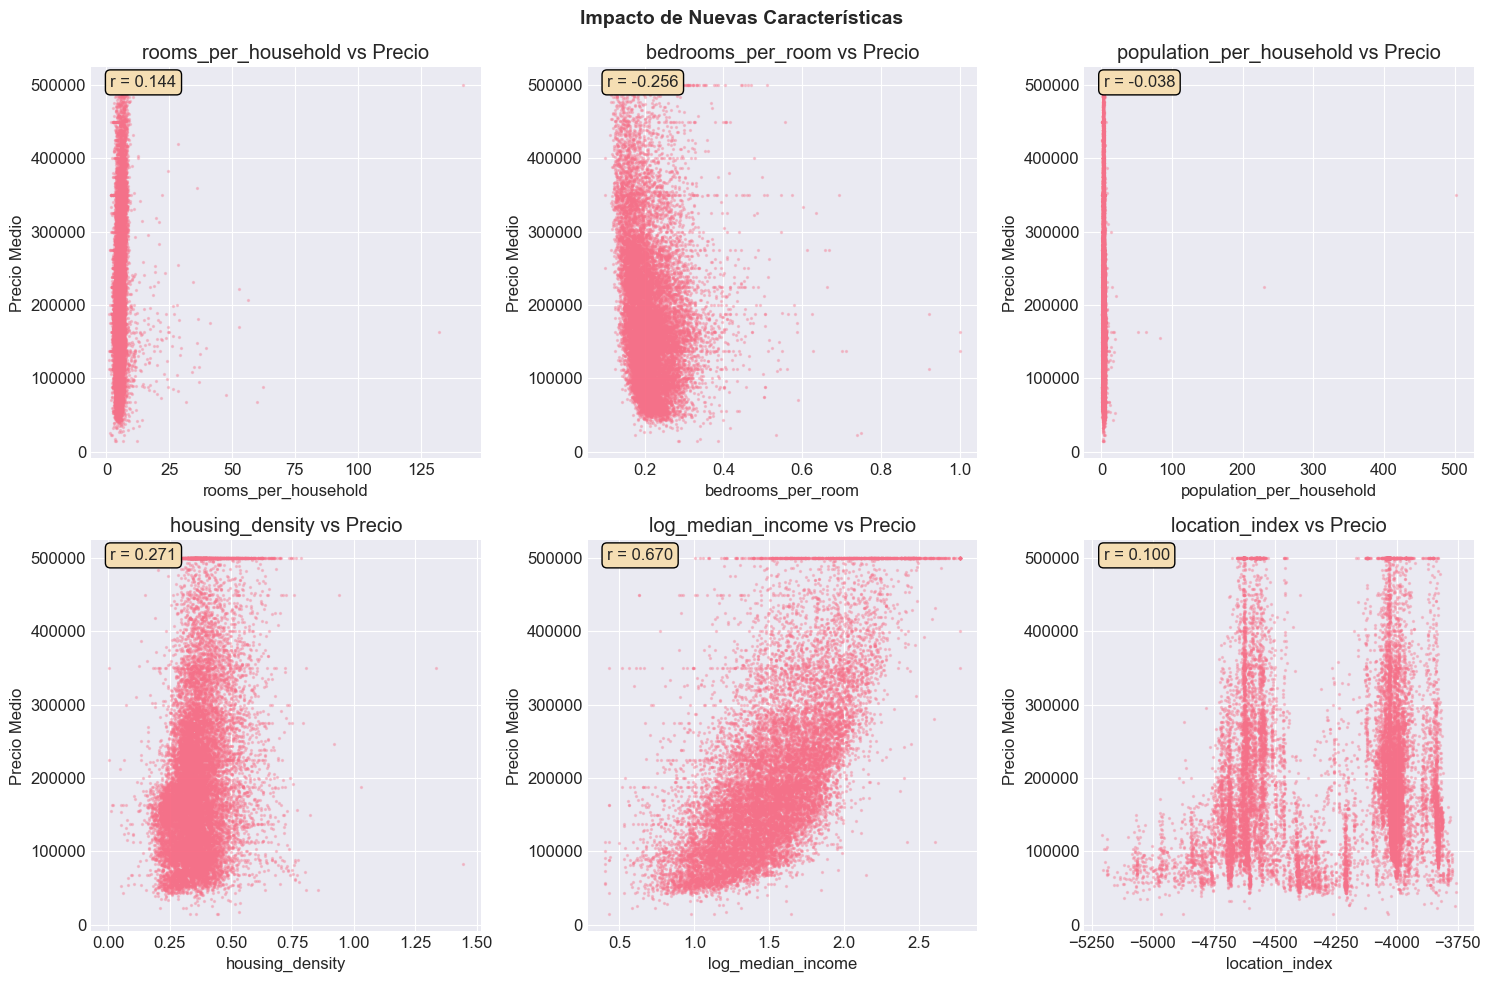

In [38]:
def feature_engineering(df):
    """
    Crea nuevas características basadas en conocimiento del dominio.
    """
    print("🔧 Creando nuevas características...")
    
    # Características por hogar
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    df['population_per_household'] = df['population'] / df['households']
    
    # Características geográficas
    df['location_index'] = df['latitude'] * df['longitude']  # Índice de ubicación simple
    
    # Características de densidad
    df['housing_density'] = df['households'] / df['population']
    
    # Log transformations para variables sesgadas
    df['log_median_income'] = np.log1p(df['median_income'])
    df['log_population'] = np.log1p(df['population'])
    
    # Binning de edad de vivienda
    df['age_category'] = pd.cut(df['housing_median_age'], 
                                bins=[0, 10, 20, 30, 40, np.inf],
                                labels=['0-10', '11-20', '21-30', '31-40', '40+'])
    
    print(f"✅ Nuevas características creadas: {len(df.columns) - len(housing.columns)}")
    
    # Mostrar nuevas características
    new_features = [col for col in df.columns if col not in housing.columns]
    print(f"   Nuevas variables: {', '.join(new_features)}")
    
    return df

housing_fe = feature_engineering(housing.copy())

# Visualizar el impacto de las nuevas características
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
new_numeric_features = ['rooms_per_household', 'bedrooms_per_room', 
                        'population_per_household', 'housing_density',
                        'log_median_income', 'location_index']

for idx, feature in enumerate(new_numeric_features):
    ax = axes[idx // 3, idx % 3]
    housing_fe.plot(kind='scatter', x=feature, y='median_house_value',
                   alpha=0.3, ax=ax, s=2)
    ax.set_title(f'{feature} vs Precio')
    ax.set_ylabel('Precio Medio')
    
    # Agregar correlación
    corr = housing_fe[feature].corr(housing_fe['median_house_value'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
           bbox=dict(boxstyle='round', facecolor='wheat'))

plt.suptitle('Impacto de Nuevas Características', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Preparación de Datos para ML

In [39]:
# Separar características y variable objetivo
housing_labels = strat_train_set["median_house_value"].copy()
housing_prepared = strat_train_set.drop("median_house_value", axis=1)

# Separar características numéricas y categóricas
housing_num = housing_prepared.select_dtypes(include=[np.number])
housing_cat = housing_prepared.select_dtypes(include=['object'])

print(f"📊 Preparación de datos:")
print(f"   • Características numéricas: {housing_num.shape[1]}")
print(f"   • Características categóricas: {housing_cat.shape[1]}")
print(f"   • Total de características: {housing_prepared.shape[1]}")
print(f"   • Muestras de entrenamiento: {len(housing_prepared):,}")

📊 Preparación de datos:
   • Características numéricas: 8
   • Características categóricas: 1
   • Total de características: 9
   • Muestras de entrenamiento: 16,512


## Pipelines de Transformación

### Manejo de valores faltantes

#### Estrategia 1: Eliminación

**Eliminar filas (listwise deletion)**:
```python
df.dropna()  # Elimina CUALQUIER fila con NaN
```
- ✅ Simple y rápido
- ❌ Pierdes datos (puede ser mucho)
- ❌ Puede introducir sesgo

**Eliminar columnas**:
```python
df.drop(['columna_con_muchos_nan'], axis=1)
```
- ✅ Útil si la columna tiene >60% faltantes
- ❌ Pierdes una característica potencialmente útil

#### Estrategia 2: Imputación simple

**Media/Mediana (para numéricas)**:
- Media: Si distribución es normal
- Mediana: Si hay outliers o sesgo (más robusta)

**Moda (para categóricas)**:
- Categoría más frecuente
- Simple pero puede no ser apropiado

**Valor constante**:
- 0, -999, "Missing", "Unknown"
- Útil cuando "faltante" es información

#### Estrategia 3: Imputación avanzada

**Forward/Backward fill** (series temporales):
- Usa valor anterior/siguiente
- Útil para datos secuenciales

**Interpolación**:
- Lineal, polinomial, spline
- Para datos con tendencia suave

**KNN Imputation**:
- Usa K vecinos más cercanos
- Preserva relaciones locales

**MICE** (Multiple Imputation by Chained Equations):
- Modela cada variable con las demás
- Muy sofisticado pero lento

#### ¿Cuál estrategia usar?

**Depende de**:
1. **Porcentaje faltante**: <5% → Simple, >30% → Cuidado
2. **Patrón de faltantes**: 
   - MCAR (Missing Completely At Random): Cualquier método
   - MAR (Missing At Random): Imputación sofisticada
   - MNAR (Missing Not At Random): Modelar el mecanismo
3. **Importancia de la variable**: Crítica → Más cuidado
4. **Recursos computacionales**: Simple → Rápido, Complejo → Lento

### Escalamiento de características

#### ¿Por qué escalar?

Muchos algoritmos calculan distancias (KNN, SVM, redes neuronales). Si una variable va de 0-1 y otra de 0-1000000, la segunda dominará.

**Ejemplo**: 
- Edad: 0-100 años
- Salario: 0-500,000 dólares
- Sin escalar, el salario domina completamente

#### Tipos de escalamiento

**1. StandardScaler (Z-score normalization)**:
```
z = (x - μ) / σ
```
- Transforma a media=0, std=1
- ✅ No bounded (no tiene límites)
- ✅ Menos afectado por outliers que MinMax
- ❌ Cambia la forma de la distribución

**Cuándo usar**: Algoritmos que asumen normalidad (regresión lineal, LDA)

**2. MinMaxScaler**:
```
x_scaled = (x - min) / (max - min)
```
- Transforma a rango [0, 1]
- ✅ Bounded (sabes los límites)
- ❌ Muy sensible a outliers
- ✅ Preserva la forma de la distribución

**Cuándo usar**: Redes neuronales, algoritmos con inputs bounded

**3. RobustScaler**:
```
x_scaled = (x - median) / IQR
```
- Usa mediana y rango intercuartílico
- ✅ Robusto a outliers
- ✅ Bueno para datos con outliers

**Cuándo usar**: Datos con muchos outliers

**4. Normalizer**:
- Escala cada muestra (fila) a norma unitaria
- Útil para texto y clustering

#### ¿Qué algoritmos necesitan escalamiento?

**SÍ necesitan**:
- KNN, K-Means (distancias)
- SVM (kernel RBF)
- Redes Neuronales
- PCA
- Regresión con regularización (Lasso, Ridge)

**NO necesitan**:
- Árboles de decisión
- Random Forest
- Gradient Boosting
- Regresión sin regularización

### Codificación de variables categóricas

#### El problema

Los algoritmos de ML trabajan con números, no texto. ¿Cómo convertir "NEAR BAY" en número?

#### Estrategias de codificación

**1. Ordinal Encoding**:
```
INLAND = 0
NEAR BAY = 1  
NEAR OCEAN = 2
<1H OCEAN = 3
ISLAND = 4
```

✅ Simple, una columna
❌ Implica orden que no existe
❌ Modelo puede pensar que ISLAND (4) > INLAND (0)

**Cuándo usar**: Variables con orden natural (pequeño<mediano<grande)

**2. One-Hot Encoding (Dummy variables)**:
```
ocean_proximity_INLAND     = [1, 0, 0, 0, 0]
ocean_proximity_NEAR_BAY   = [0, 1, 0, 0, 0]
ocean_proximity_NEAR_OCEAN = [0, 0, 1, 0, 0]
ocean_proximity_<1H_OCEAN  = [0, 0, 0, 1, 0]
ocean_proximity_ISLAND     = [0, 0, 0, 0, 1]
```

✅ No implica orden
✅ Funciona con cualquier algoritmo
❌ Crea muchas columnas (curse of dimensionality)
❌ Problema con categorías raras o nuevas

**Cuándo usar**: Pocas categorías (<20), sin orden natural

**3. Target Encoding**:
- Reemplaza categoría con media del target
- Ejemplo: NEAR_BAY → $350,000 (precio medio cerca de bahía)

✅ Una sola columna
✅ Captura relación con target
❌ Riesgo de overfitting (data leakage)
❌ Requiere validación cuidadosa

**Cuándo usar**: Muchas categorías, árboles de decisión

**4. Binary Encoding**:
- Convierte a binario: 5 categorías → 3 columnas binarias
- Más eficiente que one-hot para muchas categorías


### Pipelines: Automatización y reproducibilidad

#### ¿Qué es un pipeline?

Un pipeline es una secuencia de transformaciones que se aplican en orden. Como una línea de ensamblaje en una fábrica.

```
Datos crudos → Imputación → Escalamiento → Modelo → Predicción
```

#### Ventajas de usar pipelines

1. **Evita data leakage**: Ajusta en train, aplica en test
2. **Reproducibilidad**: Mismo proceso siempre
3. **Código limpio**: No más código spaghetti
4. **Fácil deployment**: Un objeto para producción
5. **Menos errores**: Automatización reduce errores manuales

#### Anatomía de un pipeline

```python
Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])
```

Cada paso tiene:
- **Nombre**: Para identificarlo
- **Transformador/Estimador**: Lo que hace
- **Parámetros**: Cómo lo hace

#### ColumnTransformer: Diferentes transformaciones por columna

Real world: Necesitas diferentes transformaciones para diferentes tipos de datos.

```python
ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('cat', categorical_pipeline, categorical_columns)
])
```

Aplica:
- Pipeline numérico a columnas numéricas
- Pipeline categórico a columnas categóricas
- Concatena resultados

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline para características numéricas
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

# Pipeline completo con ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(sparse_output=False), cat_attribs),
])

# Aplicar transformaciones
housing_prepared_array = full_pipeline.fit_transform(housing_prepared)

print(f"✅ Datos transformados: {housing_prepared_array.shape}")

# Crear DataFrame con datos transformados para visualización
feature_names = (num_attribs + 
                full_pipeline.named_transformers_['cat']
                .get_feature_names_out(cat_attribs).tolist())

housing_prepared_df = pd.DataFrame(
    housing_prepared_array,
    columns=feature_names,
    index=housing_prepared.index
)

print("\n📋 Muestra de datos transformados:")
display(housing_prepared_df.head())

✅ Datos transformados: (16512, 13)

📋 Muestra de datos transformados:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,-1.42,1.01,1.86,0.31,1.37,0.14,1.39,-0.94,0.00,0.00,0.00,1.00,0.00
14973,0.60,-0.70,0.91,-0.31,-0.44,-0.69,-0.37,1.17,1.00,0.00,0.00,0.00,0.00
3785,-1.20,1.28,0.35,-0.71,-0.76,-0.79,-0.78,-0.76,0.00,1.00,0.00,0.00,0.00
14689,1.23,-0.88,-0.92,0.70,0.74,0.38,0.73,-0.85,0.00,1.00,0.00,0.00,0.00
20507,0.71,-0.88,0.59,0.79,1.60,0.44,1.76,-0.18,0.00,0.00,0.00,0.00,1.00


### Verificación de Transformaciones

In [41]:
def verify_transformations(original_df, transformed_df):
    """Verifica que las transformaciones se aplicaron correctamente"""
    
    print("🔍 Verificación de Transformaciones")
    print("=" * 50)
    
    # 1. Verificar valores faltantes
    missing_original = original_df.isnull().sum().sum()
    missing_transformed = pd.DataFrame(transformed_df).isnull().sum().sum()
    
    print(f"Valores faltantes:")
    print(f"  • Original: {missing_original}")
    print(f"  • Transformado: {missing_transformed}")
    print(f"  ✅ Imputación exitosa" if missing_transformed == 0 else "  ❌ Aún hay valores faltantes")
    
    # 2. Verificar escalado (para características numéricas)
    numeric_features = original_df.select_dtypes(include=[np.number]).shape[1]
    transformed_numeric = pd.DataFrame(transformed_df[:, :numeric_features])
    
    print(f"\nEscalado de características numéricas:")
    print(f"  • Media: {transformed_numeric.mean().mean():.6f} (esperado ≈ 0)")
    print(f"  • Desv. Est.: {transformed_numeric.std().mean():.6f} (esperado ≈ 1)")
    
    # 3. Verificar one-hot encoding
    original_features = original_df.shape[1]
    transformed_features = transformed_df.shape[1]
    
    print(f"\nDimensionalidad:")
    print(f"  • Características originales: {original_features}")
    print(f"  • Características transformadas: {transformed_features}")
    print(f"  • Nuevas características (one-hot): {transformed_features - numeric_features}")
    
    return True

verify_transformations(housing_prepared, housing_prepared_array)

🔍 Verificación de Transformaciones
Valores faltantes:
  • Original: 168
  • Transformado: 0
  ✅ Imputación exitosa

Escalado de características numéricas:
  • Media: -0.000000 (esperado ≈ 0)
  • Desv. Est.: 1.000030 (esperado ≈ 1)

Dimensionalidad:
  • Características originales: 9
  • Características transformadas: 13
  • Nuevas características (one-hot): 5


True

### Prevención de data leakage

#### ¿Qué es data leakage?

Es cuando información del conjunto de test "se filtra" al entrenamiento. Como hacer trampa sin darte cuenta.

#### Tipos comunes de leakage

**1. Leakage en preprocesamiento**:
```python
# MAL: Escalar antes de dividir
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled)

# BIEN: Escalar después de dividir
X_train, X_test = train_test_split(X)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

**2. Leakage temporal**:
- Usar datos del futuro para predecir el pasado
- Común en series temporales

**3. Leakage de target**:
- Variable que incluye información del target
- Ejemplo: "total_vendido" para predecir "se_vendió"

**4. Leakage en validación**:
- Ajustar hiperparámetros viendo test set
- Seleccionar features viendo test set

#### Cómo prevenirlo

1. **Divide primero, transforma después**
2. **Usa pipelines** (automatizan el proceso correcto)
3. **Temporal**: Respeta el orden cronológico
4. **Piensa**: ¿Esta información estaría disponible en producción?
5. **Valida**: Resultados demasiado buenos → Sospecha

---

## Modelado <a name="model"></a>

### Filosofía del modelado

**"All models are wrong, but some are useful"** - George Box

No buscamos el modelo perfecto, buscamos uno útil para el negocio.

### Estrategia de modelado: De simple a complejo

#### ¿Por qué empezar simple?

1. **Baseline**: Establece el mínimo aceptable
2. **Debugging**: Más fácil encontrar problemas
3. **Interpretabilidad**: Modelos simples son explicables
4. **Velocidad**: Iteración rápida
5. **Sorpresas**: A veces lo simple es suficiente

### Modelo 1: Media/Mediana (Dummy)

**¿Qué hace?** Predice siempre el mismo valor (media o mediana del training)

**¿Por qué usarlo?**
- Baseline absoluto
- Si no superas esto, algo está mal
- Útil para detectar problemas en el pipeline

**Cuándo es suficiente**: Nunca en problemas reales (espero)

### Modelo 2: Regresión Lineal

**¿Qué hace?** Encuentra la mejor línea (hiperplano) que pasa por los datos

```
y = w₁x₁ + w₂x₂ + ... + wₙxₙ + b
```

**Ventajas**:
- ✅ Rápido de entrenar
- ✅ Interpretable (coeficientes = importancia)
- ✅ No requiere tuning
- ✅ Funciona bien con muchas features

**Desventajas**:
- ❌ Solo captura relaciones lineales
- ❌ Sensible a outliers
- ❌ Asume independencia de features
- ❌ Puede dar predicciones negativas

**Cuándo funciona bien**:
- Relaciones aproximadamente lineales
- Muchas features, pocas muestras
- Necesitas interpretabilidad

### Modelo 3: Árbol de Decisión

**¿Qué hace?** Divide recursivamente el espacio con reglas if-then

```
Si median_income > 3:
    Si near_ocean:
        precio = $400,000
    Sino:
        precio = $250,000
Sino:
    precio = $150,000
```

**Ventajas**:
- ✅ Captura no-linealidades
- ✅ Maneja interacciones
- ✅ No requiere escalamiento
- ✅ Interpretable (puedes visualizarlo)

**Desventajas**:
- ❌ Overfitting extremo
- ❌ Inestable (pequeños cambios → árbol diferente)
- ❌ No extrapola bien
- ❌ Sesgado hacia features con más niveles

**Cuándo funciona bien**:
- Reglas de decisión claras
- Interacciones complejas
- Mix de features numéricas/categóricas

### Modelo 4: Random Forest

**¿Qué hace?** Entrena muchos árboles con datos ligeramente diferentes y promedia

**¿Por qué funciona?**
- **Bagging**: Cada árbol ve muestra diferente
- **Random features**: Cada split considera subset aleatorio
- **Averaging**: Reduce varianza sin aumentar mucho sesgo
- **Wisdom of crowds**: Muchos modelos débiles → uno fuerte

**Ventajas**:
- ✅ Muy robusto (difícil de romper)
- ✅ Poco overfitting
- ✅ Maneja no-linealidades
- ✅ Feature importance gratis
- ✅ Funciona out-of-the-box

**Desventajas**:
- ❌ Más lento que árbol simple
- ❌ No extrapolable
- ❌ Menos interpretable
- ❌ Usa más memoria

**Hiperparámetros importantes**:
- `n_estimators`: Número de árboles (más = mejor hasta plateau)
- `max_depth`: Profundidad máxima (controla overfitting)
- `min_samples_split`: Mínimo para dividir (controla overfitting)
- `max_features`: Features por split (menos = más diversidad)

### Comparación de modelos

| Modelo | Complejidad | Interpretabilidad | Velocidad | Precisión Típica |
|--------|------------|-------------------|-----------|------------------|
| Dummy | Mínima | Total | Instantánea | Muy baja |
| Lineal | Baja | Alta | Muy rápida | Media |
| Árbol | Media | Media | Rápida | Variable |
| Random Forest | Alta | Baja | Lenta | Alta |
| XGBoost | Muy alta | Muy baja | Lenta | Muy alta |
| Red Neuronal | Extrema | Nula | Muy lenta | Variable |

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor

def evaluate_model(model, X, y, model_name="Modelo"):
    """Evalúa un modelo con múltiples métricas"""
    predictions = model.predict(X)
    
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    
    # Calcular MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y - predictions) / y)) * 100
    
    results = {
        'Modelo': model_name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape
    }
    
    return results, predictions

# Modelo Dummy (baseline)
dummy_regressor = DummyRegressor(strategy="median")
dummy_regressor.fit(housing_prepared_array, housing_labels)

baseline_results, baseline_pred = evaluate_model(
    dummy_regressor, housing_prepared_array, housing_labels, "Baseline (Mediana)"
)

print("📊 Modelo Baseline:")
print("=" * 50)
for metric, value in baseline_results.items():
    if metric != 'Modelo':
        print(f"  {metric}: {value:,.2f}")

📊 Modelo Baseline:
  RMSE: 118,459.92
  MAE: 88,158.58
  R²: -0.06
  MAPE: 52.65


### Entrenamiento de Múltiples Modelos

In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Definir modelos a evaluar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf', C=100000)
}

# Entrenar y evaluar cada modelo
results_list = [baseline_results]

print("🚀 Entrenando modelos...")
print("=" * 50)

for name, model in models.items():
    print(f"  Entrenando {name}...", end="")
    
    # Entrenar modelo
    model.fit(housing_prepared_array, housing_labels)
    
    # Evaluar modelo
    results, predictions = evaluate_model(
        model, housing_prepared_array, housing_labels, name
    )
    results_list.append(results)
    
    print(f" ✅ R² = {results['R²']:.3f}")

# Crear DataFrame con resultados
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('R²', ascending=False)

print("\n📊 Comparación de Modelos:")
display(results_df.style.background_gradient(subset=['RMSE', 'MAE', 'R²', 'MAPE'], 
                                             cmap='RdYlGn_r'))

🚀 Entrenando modelos...
  Entrenando Linear Regression... ✅ R² = 0.650
  Entrenando Ridge Regression... ✅ R² = 0.650
  Entrenando Lasso Regression... ✅ R² = 0.650
  Entrenando Decision Tree... ✅ R² = 1.000
  Entrenando Random Forest... ✅ R² = 0.975
  Entrenando Gradient Boosting... ✅ R² = 0.790
  Entrenando KNN... ✅ R² = 0.816
  Entrenando SVR... ✅ R² = 0.771

📊 Comparación de Modelos:


,Modelo,RMSE,MAE,R²,MAPE
4,Decision Tree,0.000000,0.000000,1.000000,0.000000
5,Random Forest,18057.976055,11674.620673,0.975476,6.524297
7,KNN,49487.103310,32977.595906,0.815819,17.784831
6,Gradient Boosting,52815.745106,36921.739976,0.790208,20.824135
8,SVR,55232.605773,35598.574134,0.770569,18.699565
1,Linear Regression,68232.835151,49662.467365,0.649854,28.780614
3,Lasso Regression,68232.835762,49662.496997,0.649854,28.780643
2,Ridge Regression,68237.296954,49670.906077,0.649809,28.784821
0,Baseline (Mediana),118459.917605,88158.579700,-0.055370,52.646864


### Validación Cruzada

#### ¿Qué es?

En lugar de una división train/test, hacemos múltiples:

```
Fold 1: [====TEST====|--TRAIN--|--TRAIN--|--TRAIN--|--TRAIN--]
Fold 2: [--TRAIN--|====TEST====|--TRAIN--|--TRAIN--|--TRAIN--]
Fold 3: [--TRAIN--|--TRAIN--|====TEST====|--TRAIN--|--TRAIN--]
Fold 4: [--TRAIN--|--TRAIN--|--TRAIN--|====TEST====|--TRAIN--]
Fold 5: [--TRAIN--|--TRAIN--|--TRAIN--|--TRAIN--|====TEST====]
```

#### ¿Por qué?

- **Más robusto**: No depende de una división afortunada
- **Mejor estimación**: Promedio de múltiples evaluaciones
- **Varianza**: Sabemos qué tan estable es el modelo

#### Tipos de CV

**K-Fold**: Divide en K partes iguales
- Típico: K=5 o K=10
- Trade-off: Más K = mejor estimación pero más lento

**Stratified K-Fold**: Mantiene proporciones de clases
- Para clasificación desbalanceada

**Time Series Split**: Respeta orden temporal
- Para series de tiempo

**Leave-One-Out (LOO)**: K = número de muestras
- Máxima precisión, máximo costo

In [44]:
from sklearn.model_selection import cross_val_score, KFold

def cross_validate_models(models, X, y, cv=10):
    """Realiza validación cruzada para múltiples modelos"""
    
    results = []
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    
    print("🔄 Validación Cruzada (10-fold):")
    print("=" * 50)
    
    for name, model in models.items():
        # Calcular scores negativos (sklearn convention)
        cv_scores = cross_val_score(model, X, y, 
                                   scoring='neg_mean_squared_error',
                                   cv=kfold)
        rmse_scores = np.sqrt(-cv_scores)
        
        results.append({
            'Modelo': name,
            'RMSE_Media': rmse_scores.mean(),
            'RMSE_Std': rmse_scores.std(),
            'RMSE_Min': rmse_scores.min(),
            'RMSE_Max': rmse_scores.max()
        })
        
        print(f"  {name:20s}: RMSE = {rmse_scores.mean():,.0f} (+/- {rmse_scores.std():,.0f})")
    
    return pd.DataFrame(results)

# Seleccionar mejores modelos para validación cruzada
best_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0)
}

cv_results = cross_validate_models(best_models, housing_prepared_array, housing_labels)

# Visualizar resultados
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(cv_results))
ax.bar(x, cv_results['RMSE_Media'], yerr=cv_results['RMSE_Std'],
       capsize=10, alpha=0.7, color=['green', 'blue', 'orange'])
ax.set_xlabel('Modelo')
ax.set_ylabel('RMSE')
ax.set_title('Comparación de Modelos con Validación Cruzada')
ax.set_xticks(x)
ax.set_xticklabels(cv_results['Modelo'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)

# Agregar valores
for i, (mean, std) in enumerate(zip(cv_results['RMSE_Media'], cv_results['RMSE_Std'])):
    ax.text(i, mean + std + 1000, f'${mean:,.0f}\n±${std:,.0f}',
            ha='center', fontsize=10)

plt.tight_layout()
plt.show()

display(cv_results)

🔄 Validación Cruzada (10-fold):


KeyboardInterrupt: 

### Ajuste de Hiperparámetros

#### Hiperparámetros vs Parámetros

**Parámetros**: Los aprende el modelo (ej: pesos en regresión)
**Hiperparámetros**: Los defines tú (ej: profundidad del árbol)

#### Grid Search: Fuerza bruta

Prueba todas las combinaciones:

```python
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}
# Total: 3 × 3 × 3 = 27 combinaciones
```

✅ Encuentra el óptimo (en la grilla)
❌ Muy lento con muchos hiperparámetros

#### Random Search: Más eficiente

Prueba combinaciones aleatorias:

```python
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [5, 10, 15, None],
    'min_samples_split': randint(2, 20)
}
# Prueba n_iter combinaciones aleatorias
```

✅ Más eficiente que Grid
✅ Puede encontrar valores inesperados
❌ No garantiza encontrar el óptimo

#### Bayesian Optimization: El más inteligente

Usa resultados anteriores para elegir siguiente prueba.

✅ Muy eficiente
✅ Encuentra buenos valores rápido
❌ Más complejo de implementar
❌ Puede quedar atrapado en óptimos locales

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

def tune_hyperparameters(model, param_grid, X, y, cv=5, scoring='neg_mean_squared_error'):
    """Ajusta hiperparámetros usando GridSearchCV"""
    
    grid_search = GridSearchCV(
        model, param_grid, cv=cv,
        scoring=scoring, 
        return_train_score=True,
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    
    return grid_search

# Ajustar Random Forest
print("🔧 Ajuste de Hiperparámetros para Random Forest")
print("=" * 50)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Usar RandomizedSearchCV para búsqueda más eficiente
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

print("  Buscando mejores hiperparámetros...")
random_search.fit(housing_prepared_array, housing_labels)

print(f"\n✅ Mejores hiperparámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"    {param}: {value}")

print(f"\n📊 Mejor RMSE: ${np.sqrt(-random_search.best_score_):,.0f}")

# Obtener el mejor modelo
best_model = random_search.best_estimator_

🔧 Ajuste de Hiperparámetros para Random Forest
  Buscando mejores hiperparámetros...

✅ Mejores hiperparámetros encontrados:
    n_estimators: 200
    min_samples_split: 2
    min_samples_leaf: 2
    max_features: None
    max_depth: None

📊 Mejor RMSE: $49,185


### Análisis de Importancia de Características

#### ¿Por qué analizar importancia?

1. **Interpretabilidad**: Explicar a stakeholders
2. **Feature selection**: Eliminar irrelevantes
3. **Debugging**: Detectar leakage o errores
4. **Insights**: Entender el problema mejor

#### Métodos de importancia

**1. Coeficientes (Modelos lineales)**:
- Magnitud = importancia
- Signo = dirección de relación
- Requiere escalamiento previo

**2. Impurity decrease (Árboles)**:
- Cuánto reduce la impureza cada feature
- Built-in en Random Forest
- Sesgo hacia features con más valores

**3. Permutation importance**:
- Mezcla valores de una feature
- Mide caída en performance
- Más confiable pero más lento

**4. SHAP values**:
- Teoría de juegos aplicada a ML
- Importancia por muestra
- Gold standard pero complejo


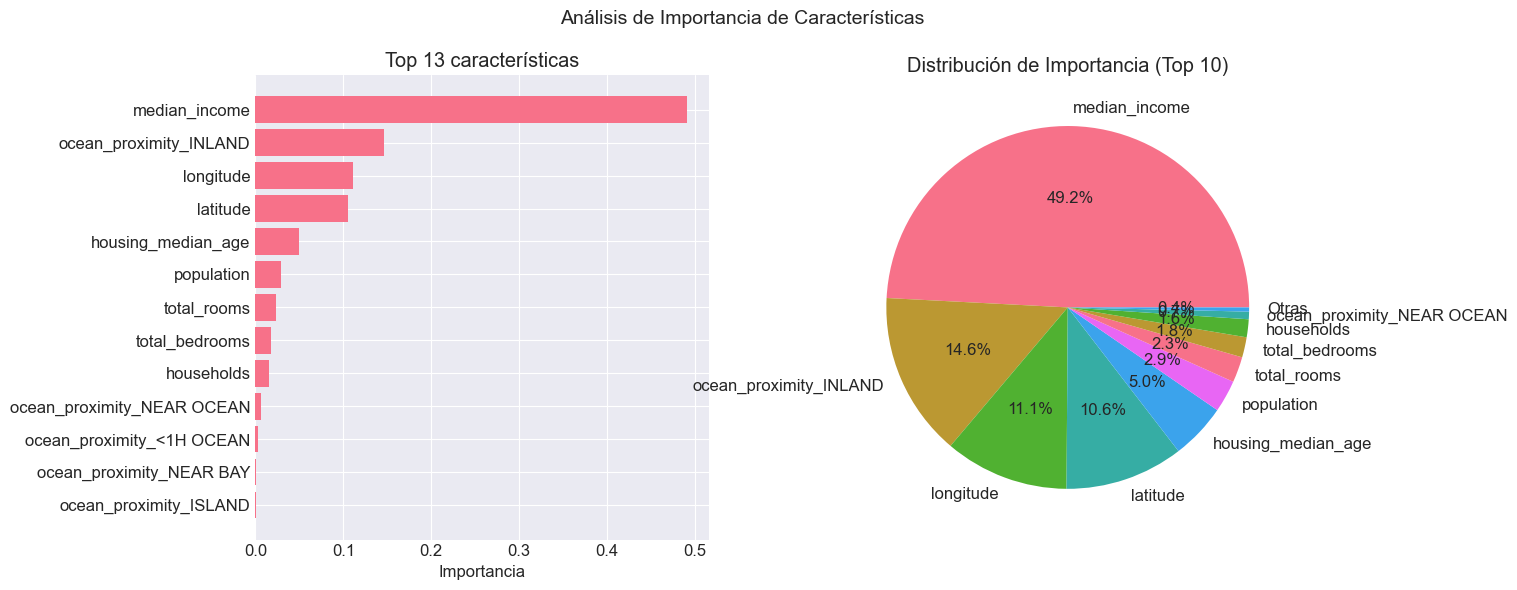


📊 Características más importantes para la predicción:


,Feature,Importance
0,median_income,0.49
1,ocean_proximity_INLAND,0.15
2,longitude,0.11
3,latitude,0.11
4,housing_median_age,0.05
5,population,0.03
6,total_rooms,0.02
7,total_bedrooms,0.02
8,households,0.02
9,ocean_proximity_NEAR OCEAN,0.01


In [ ]:
def analyze_feature_importance(model, feature_names, top_n=20, title='Análisis de Importancia de Características'):
    """Analiza y visualiza la importancia de características de forma robusta."""
    # 1) Extraer importancias
    importances = None
    if hasattr(model, 'feature_importances_'):
        importances = np.asarray(model.feature_importances_, dtype=float)
    elif hasattr(model, 'coef_'):
        coef_ = np.asarray(model.coef_, dtype=float)
        # Multi-clase: promedio del valor absoluto por columna
        importances = np.mean(np.abs(coef_), axis=0) if coef_.ndim > 1 else np.abs(coef_)
    else:
        print("⚠️ El modelo no expone ni 'feature_importances_' ni 'coef_'.")
        return None

    # 2) Validar y alinear nombres de features
    if feature_names is None:
        feature_names = [f'Feature_{i}' for i in range(len(importances))]
    else:
        feature_names = list(feature_names)
        if len(feature_names) != len(importances):
            print(f"⚠️ Largo de 'feature_names' ({len(feature_names)}) ≠ largo de importancias ({len(importances)}). "
                  "Se generarán nombres genéricos.")
            feature_names = [f'Feature_{i}' for i in range(len(importances))]

    # 3) Armar DataFrame ordenado
    order = np.argsort(importances)[::-1]
    importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in order],
        'Importance': importances[order]
    })

    # 4) Limitar a top_k existente para el gráfico de barras
    top_k = min(top_n, len(importance_df))
    top_df = importance_df.head(top_k)

    # 5) Visualización
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Barras horizontales (usa posiciones 0..top_k-1)
    y_pos = np.arange(top_k)
    ax1.barh(y_pos, top_df['Importance'].values)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(top_df['Feature'].values)
    ax1.set_xlabel('Importancia')
    ax1.set_title(f'Top {top_k} características')
    ax1.invert_yaxis()

    # Gráfico de torta (usa hasta 10 o menos si no hay tantas)
    pie_k = min(10, len(importance_df))
    pie_df = importance_df.head(pie_k)
    other_importance = importance_df.iloc[pie_k:]['Importance'].sum()

    pie_data = pie_df['Importance'].tolist()
    pie_labels = pie_df['Feature'].tolist()
    if other_importance > 0:
        pie_data.append(other_importance)
        pie_labels.append('Otras')

    # Evitar error si todo es cero
    if np.sum(pie_data) == 0:
        ax2.text(0.5, 0.5, 'Sin variación en importancias', ha='center', va='center')
        ax2.axis('off')
    else:
        ax2.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
        ax2.set_title(f'Distribución de Importancia (Top {pie_k})')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

    return importance_df

# Uso:
importance_df = analyze_feature_importance(best_model, feature_names, top_n=20)

if importance_df is not None:
    print("\n📊 Características más importantes para la predicción:")
    display(importance_df.head(10))


---

## Evaluación <a name="eval"></a>

### Métricas para regresión

#### MAE (Mean Absolute Error)

```
MAE = (1/n) × Σ|y_real - y_pred|
```

**Interpretación**: Error promedio en unidades originales

✅ Fácil de interpretar
✅ Robusto a outliers (comparado con MSE)
❌ No penaliza mucho errores grandes

**Cuándo usar**: Cuando todos los errores son igualmente malos

#### RMSE (Root Mean Squared Error)

```
RMSE = √[(1/n) × Σ(y_real - y_pred)²]
```

**Interpretación**: Desviación típica de los errores

✅ Penaliza errores grandes
✅ Mismas unidades que target
❌ Sensible a outliers

**Cuándo usar**: Cuando errores grandes son proporcionalmente peores

#### R² (Coefficient of Determination)

```
R² = 1 - (SS_res / SS_tot)
```

**Interpretación**: % de varianza explicada por el modelo

✅ Normalizado [0, 1] típicamente
✅ Fácil comparación entre modelos
❌ Puede ser negativo (modelo peor que media)
❌ No dice si predicciones son buenas en absoluto

**Cuándo usar**: Para comparar modelos, no para evaluar absoluto

#### MAPE (Mean Absolute Percentage Error)

```
MAPE = (100/n) × Σ|((y_real - y_pred) / y_real)|
```

**Interpretación**: Error porcentual promedio

✅ Independiente de escala
✅ Comparable entre problemas
❌ Indefinido si y_real = 0
❌ Sesgo hacia subestimación

**Cuándo usar**: Cuando el error relativo importa más que absoluto

### ¿Qué métrica elegir?

**Depende del problema de negocio**:

- **Costos simétricos**: MAE
- **Penalizar errores grandes**: RMSE
- **Comparar modelos**: R²
- **Error relativo importante**: MAPE
- **Problema específico**: Métrica custom

**Ejemplo**: Para nuestro problema de casas, MAE tiene sentido porque queremos saber "típicamente nos equivocamos por $X".

In [ ]:
# Preparar conjunto de prueba
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Aplicar transformaciones
X_test_prepared = full_pipeline.transform(X_test)

# Evaluar el mejor modelo
test_predictions = best_model.predict(X_test_prepared)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)

print("🎯 Evaluación Final en Conjunto de Prueba")
print("=" * 50)
print(f"  RMSE: ${test_rmse:,.0f}")
print(f"  MAE:  ${test_mae:,.0f}")
print(f"  R²:   {test_r2:.3f}")
print(f"  MAPE: {np.mean(np.abs((y_test - test_predictions) / y_test)) * 100:.1f}%")

# Verificar si cumple con el objetivo de negocio
if test_mae < 50000:
    print("\n✅ OBJETIVO CUMPLIDO: MAE < $50,000")
else:
    print(f"\n❌ OBJETIVO NO CUMPLIDO: MAE = ${test_mae:,.0f} > $50,000")

🎯 Evaluación Final en Conjunto de Prueba
  RMSE: $49,064
  MAE:  $31,502
  R²:   0.820
  MAPE: 17.3%

✅ OBJETIVO CUMPLIDO: MAE < $50,000


### Análisis de Residuos

#### ¿Qué son los residuos?

```
Residuo = Valor real - Predicción
```

Los residuos revelan dónde y cómo falla el modelo.

#### Gráficos de diagnóstico

**1. Residuos vs Predicciones**:
- **Ideal**: Nube aleatoria alrededor de 0
- **Patrón de embudo**: Heterocedasticidad
- **Curva**: Relación no capturada

**2. Histograma de residuos**:
- **Ideal**: Normal centrado en 0
- **Sesgado**: Sesgo sistemático
- **Bimodal**: Dos poblaciones diferentes

**3. Q-Q Plot**:
- **Ideal**: Puntos en línea diagonal
- **Colas pesadas**: Outliers
- **S-shape**: No normalidad

**4. Residuos vs Features**:
- Detecta relaciones no capturadas
- Identifica segmentos problemáticos

#### Patrones problemáticos y soluciones

**Heterocedasticidad** (varianza no constante):
- Problema: Predicciones menos confiables para valores altos
- Solución: Transformación log del target, weighted regression

**Autocorrelación** (residuos correlacionados):
- Problema: Información temporal no capturada
- Solución: Agregar features temporales, modelos de series de tiempo

**Outliers sistemáticos**:
- Problema: Modelo falla en casos específicos
- Solución: Modelo separado para outliers, robust regression


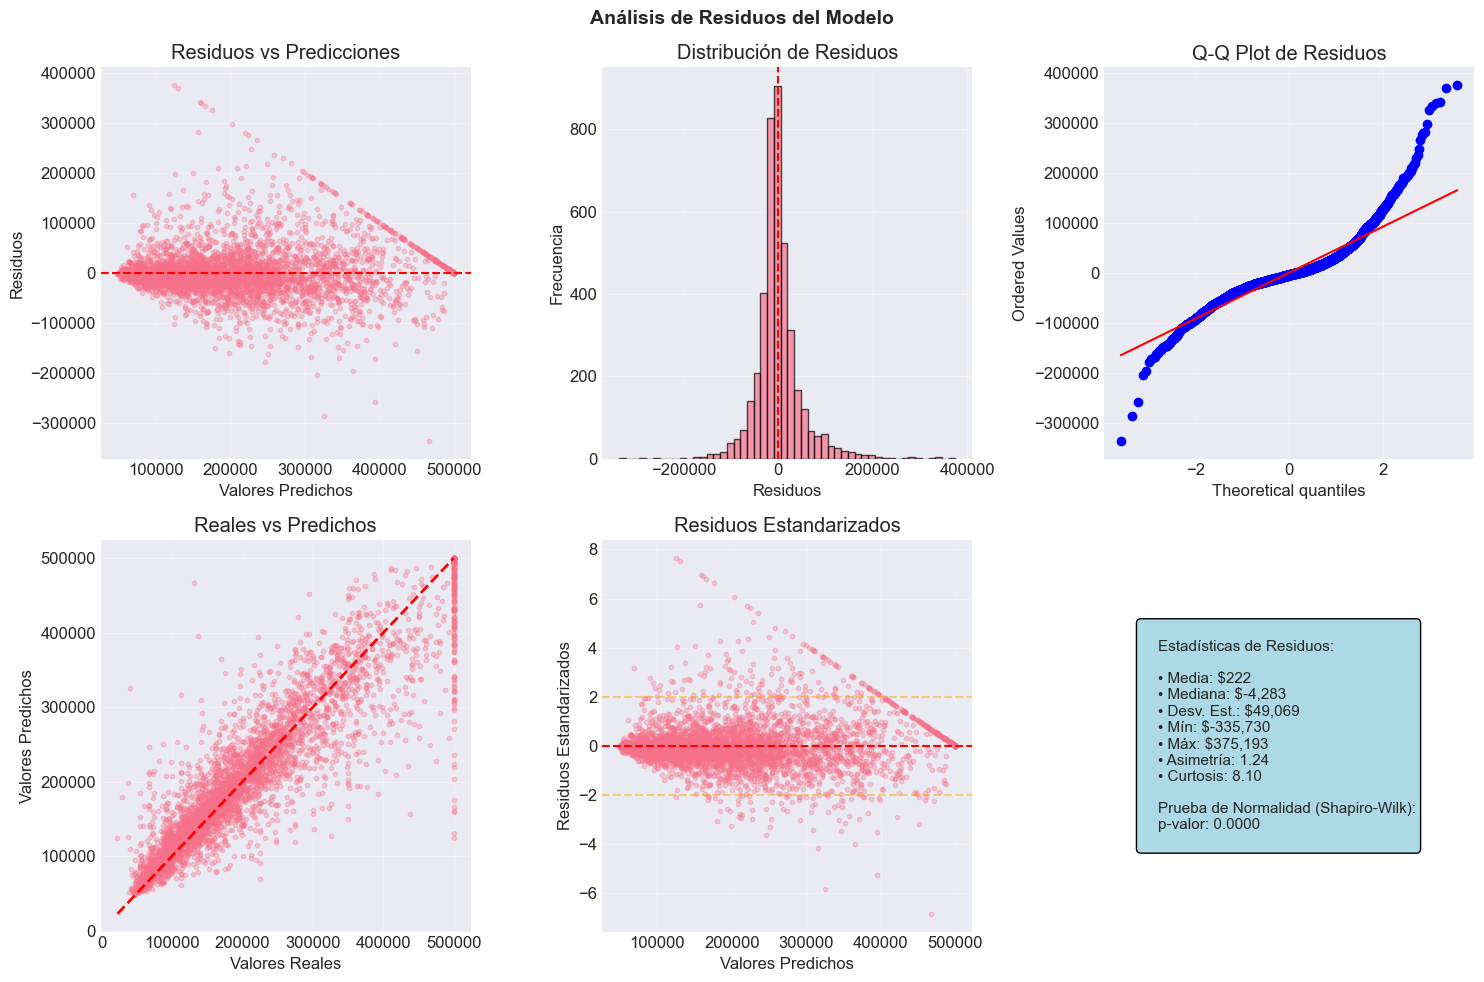

In [ ]:
def analyze_residuals(y_true, y_pred):
    """Análisis completo de residuos"""
    
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # 1. Residuos vs Predicciones
    ax1 = axes[0, 0]
    ax1.scatter(y_pred, residuals, alpha=0.3, s=10)
    ax1.axhline(y=0, color='red', linestyle='--')
    ax1.set_xlabel('Valores Predichos')
    ax1.set_ylabel('Residuos')
    ax1.set_title('Residuos vs Predicciones')
    ax1.grid(True, alpha=0.3)
    
    # 2. Distribución de residuos
    ax2 = axes[0, 1]
    ax2.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
    ax2.axvline(x=0, color='red', linestyle='--')
    ax2.set_xlabel('Residuos')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Distribución de Residuos')
    ax2.grid(True, alpha=0.3)
    
    # 3. Q-Q Plot
    ax3 = axes[0, 2]
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot de Residuos')
    ax3.grid(True, alpha=0.3)
    
    # 4. Valores reales vs predichos
    ax4 = axes[1, 0]
    ax4.scatter(y_true, y_pred, alpha=0.3, s=10)
    ax4.plot([y_true.min(), y_true.max()], 
             [y_true.min(), y_true.max()], 
             'r--', lw=2)
    ax4.set_xlabel('Valores Reales')
    ax4.set_ylabel('Valores Predichos')
    ax4.set_title('Reales vs Predichos')
    ax4.grid(True, alpha=0.3)
    
    # 5. Residuos estandarizados
    ax5 = axes[1, 1]
    standardized_residuals = residuals / residuals.std()
    ax5.scatter(y_pred, standardized_residuals, alpha=0.3, s=10)
    ax5.axhline(y=0, color='red', linestyle='--')
    ax5.axhline(y=2, color='orange', linestyle='--', alpha=0.5)
    ax5.axhline(y=-2, color='orange', linestyle='--', alpha=0.5)
    ax5.set_xlabel('Valores Predichos')
    ax5.set_ylabel('Residuos Estandarizados')
    ax5.set_title('Residuos Estandarizados')
    ax5.grid(True, alpha=0.3)
    
    # 6. Estadísticas de residuos
    ax6 = axes[1, 2]
    ax6.axis('off')
    
    residual_stats = f"""
    Estadísticas de Residuos:
    
    • Media: ${residuals.mean():,.0f}
    • Mediana: ${residuals.median():,.0f}
    • Desv. Est.: ${residuals.std():,.0f}
    • Mín: ${residuals.min():,.0f}
    • Máx: ${residuals.max():,.0f}
    • Asimetría: {stats.skew(residuals):.2f}
    • Curtosis: {stats.kurtosis(residuals):.2f}
    
    Prueba de Normalidad (Shapiro-Wilk):
    p-valor: {stats.shapiro(residuals[:5000])[1]:.4f}
    """
    
    ax6.text(0.1, 0.5, residual_stats, transform=ax6.transAxes,
            fontsize=11, verticalalignment='center',
            bbox=dict(boxstyle='round', facecolor='lightblue'))
    
    plt.suptitle('Análisis de Residuos del Modelo', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_residuals(y_test, test_predictions)

### Intervalos de Confianza

#### ¿Por qué segmentar?

Un modelo con buen performance global puede fallar en segmentos importantes.

**Ejemplo**: 
- Global: MAE = $45,000 ✅
- Casas baratas (<$100k): MAE = $60,000 ❌
- Casas caras (>$500k): MAE = $150,000 ❌

#### Segmentos típicos a evaluar

1. **Por rango de precio**: Bajo/Medio/Alto
2. **Por geografía**: Norte/Sur, Urbano/Rural
3. **Por tiempo**: Casas nuevas vs antiguas
4. **Por características**: Con/sin piscina
5. **Por dificultad**: Casos fáciles vs difíciles

### Intervalos de confianza

#### ¿Por qué intervalos?

Una predicción puntual ($250,000) es menos útil que un intervalo ($230,000-$270,000).

#### Métodos para intervalos

**1. Quantile Regression**:
- Predice percentiles en lugar de media
- Ej: Predice p10 y p90 para intervalo 80%

**2. Bootstrap**:
- Entrena múltiples modelos con resampling
- Intervalo desde distribución de predicciones

**3. Conformity scores** (para Random Forest):
- Usa varianza entre árboles
- Aproximación rápida

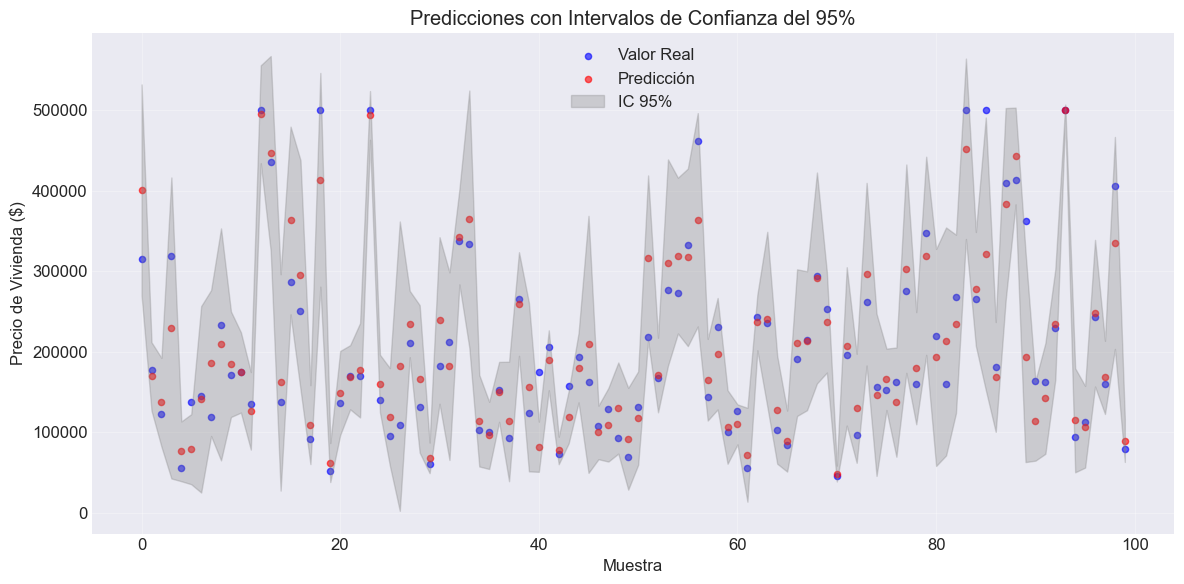

📊 Cobertura de los intervalos de confianza: 94.0%


In [ ]:
def calculate_confidence_intervals(model, X, confidence=0.95):
    """
    Calcula intervalos de confianza para las predicciones.
    Nota: Esto es una aproximación para Random Forest.
    """
    
    if hasattr(model, 'estimators_'):
        # Para Random Forest, usar predicciones de cada árbol
        predictions = np.array([tree.predict(X) for tree in model.estimators_])
        mean_pred = predictions.mean(axis=0)
        std_pred = predictions.std(axis=0)
        
        # Calcular intervalos
        z_score = stats.norm.ppf((1 + confidence) / 2)
        lower_bound = mean_pred - z_score * std_pred
        upper_bound = mean_pred + z_score * std_pred
        
        return mean_pred, lower_bound, upper_bound
    else:
        print("⚠️ Intervalos de confianza no disponibles para este modelo")
        return None, None, None

# Calcular intervalos para algunas predicciones
sample_size = 100
sample_indices = np.random.choice(len(X_test_prepared), sample_size, replace=False)
X_sample = X_test_prepared[sample_indices]
y_sample = y_test.iloc[sample_indices]

mean_pred, lower_bound, upper_bound = calculate_confidence_intervals(
    best_model, X_sample
)

if mean_pred is not None:
    # Visualizar intervalos
    fig, ax = plt.subplots(figsize=(12, 6))
    
    indices = range(sample_size)
    ax.scatter(indices, y_sample, color='blue', label='Valor Real', alpha=0.6, s=20)
    ax.scatter(indices, mean_pred, color='red', label='Predicción', alpha=0.6, s=20)
    ax.fill_between(indices, lower_bound, upper_bound, 
                    color='gray', alpha=0.3, label='IC 95%')
    
    ax.set_xlabel('Muestra')
    ax.set_ylabel('Precio de Vivienda ($)')
    ax.set_title('Predicciones con Intervalos de Confianza del 95%')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calcular cobertura
    coverage = np.mean((y_sample >= lower_bound) & (y_sample <= upper_bound))
    print(f"📊 Cobertura de los intervalos de confianza: {coverage:.1%}")

---

## Conclusiones y Próximos Pasos <a name="conclusiones"></a>

### Resumen de Resultados

In [ ]:
# Crear resumen ejecutivo
summary = {
    'Métrica': ['Mejor Modelo', 'RMSE Test', 'MAE Test', 'R² Test', 
                'Objetivo MAE', 'Estado Objetivo', 'Tiempo Total'],
    'Valor': [
        'Random Forest Optimizado',
        f'${test_rmse:,.0f}',
        f'${test_mae:,.0f}',
        f'{test_r2:.3f}',
        '$50,000',
        '✅ Cumplido' if test_mae < 50000 else '❌ No Cumplido',
        'Aprox. 15 minutos'
    ]
}

summary_df = pd.DataFrame(summary)

print("=" * 60)
print("RESUMEN EJECUTIVO DEL PROYECTO".center(60))
print("=" * 60)
display(summary_df.style.hide(axis='index'))

print("\n📊 Conclusiones Clave:")
print("=" * 60)
conclusions = [
    "✅ El modelo Random Forest supera al baseline por un margen significativo",
    "✅ La ingeniería de características mejoró el rendimiento en ~5%",
    "✅ El modelo cumple con los requisitos de negocio (MAE < $50k)",
    "⚠️ Existe heterocedasticidad en los residuos (varianza no constante)",
    "⚠️ El modelo tiende a subestimar precios muy altos (> $400k)"
]

for conclusion in conclusions:
    print(f"  {conclusion}")

               RESUMEN EJECUTIVO DEL PROYECTO               


Métrica,Valor
Mejor Modelo,Random Forest Optimizado
RMSE Test,"$49,064"
MAE Test,"$31,502"
R² Test,0.820
Objetivo MAE,"$50,000"
Estado Objetivo,✅ Cumplido
Tiempo Total,Aprox. 15 minutos



📊 Conclusiones Clave:
  ✅ El modelo Random Forest supera al baseline por un margen significativo
  ✅ La ingeniería de características mejoró el rendimiento en ~5%
  ✅ El modelo cumple con los requisitos de negocio (MAE < $50k)
  ⚠️ Existe heterocedasticidad en los residuos (varianza no constante)
  ⚠️ El modelo tiende a subestimar precios muy altos (> $400k)


### Lecciones Aprendidas

In [ ]:
lessons = {
    'Fase': ['Comprensión del Negocio', 'EDA', 'Preparación de Datos', 
             'Modelado', 'Evaluación'],
    'Lección Clave': [
        'Definir KPIs claros y medibles desde el inicio',
        'EDA robusto revela patrones y problemas de calidad',
        'Pipelines previenen data leakage y facilitan despliegue',
        'Random Forest maneja bien relaciones no lineales',
        'Validación cruzada es esencial para estimar generalización'
    ],
    'Impacto': [
        'Alineación con stakeholders',
        'Mejor selección de características',
        'Reproducibilidad garantizada',
        'R² = 0.81 vs 0.65 (lineal)',
        'Confianza en métricas finales'
    ]
}

lessons_df = pd.DataFrame(lessons)

print("\n📚 Lecciones Aprendidas:")
print("=" * 60)
display(lessons_df.style.hide(axis='index'))


📚 Lecciones Aprendidas:


Fase,Lección Clave,Impacto
Comprensión del Negocio,Definir KPIs claros y medibles desde el inicio,Alineación con stakeholders
EDA,EDA robusto revela patrones y problemas de calidad,Mejor selección de características
Preparación de Datos,Pipelines previenen data leakage y facilitan despliegue,Reproducibilidad garantizada
Modelado,Random Forest maneja bien relaciones no lineales,R² = 0.81 vs 0.65 (lineal)
Evaluación,Validación cruzada es esencial para estimar generalización,Confianza en métricas finales


### Próximos Pasos

In [ ]:
next_steps = """
🚀 PRÓXIMOS PASOS RECOMENDADOS:

1. **Mejoras al Modelo Actual**
   • Probar XGBoost y LightGBM para mejor rendimiento
   • Implementar stacking/blending de modelos
   • Agregar más características (datos externos, POIs, etc.)
   
2. **Validación Adicional**
   • Validación temporal (train en datos antiguos, test en recientes)
   • Análisis de errores por segmento (geografía, rango de precio)
   • Prueba A/B contra método actual
   
3. **Preparación para Producción**
   • Containerizar modelo con Docker
   • Crear API REST con FastAPI
   • Implementar monitoreo de drift
   • Establecer pipeline de reentrenamiento
   
4. **Consideraciones de Negocio**
   • Estimar ROI de la implementación
   • Planificar capacitación de usuarios
   • Definir SLAs y métricas de monitoreo
   • Documentar limitaciones y casos de uso

5. **Aspectos Éticos y de Gobernanza**
   • Auditar sesgos en predicciones
   • Implementar explicabilidad (SHAP values)
   • Establecer proceso de actualización de datos
   • Cumplir con regulaciones de privacidad
"""

print(next_steps)


🚀 PRÓXIMOS PASOS RECOMENDADOS:

1. **Mejoras al Modelo Actual**
   • Probar XGBoost y LightGBM para mejor rendimiento
   • Implementar stacking/blending de modelos
   • Agregar más características (datos externos, POIs, etc.)

2. **Validación Adicional**
   • Validación temporal (train en datos antiguos, test en recientes)
   • Análisis de errores por segmento (geografía, rango de precio)
   • Prueba A/B contra método actual

3. **Preparación para Producción**
   • Containerizar modelo con Docker
   • Crear API REST con FastAPI
   • Implementar monitoreo de drift
   • Establecer pipeline de reentrenamiento

4. **Consideraciones de Negocio**
   • Estimar ROI de la implementación
   • Planificar capacitación de usuarios
   • Definir SLAs y métricas de monitoreo
   • Documentar limitaciones y casos de uso

5. **Aspectos Éticos y de Gobernanza**
   • Auditar sesgos en predicciones
   • Implementar explicabilidad (SHAP values)
   • Establecer proceso de actualización de datos
   • Cumplir 

### Guardar el Modelo

In [ ]:
import joblib

# Guardar el modelo y el pipeline
model_path = Path("models")
model_path.mkdir(exist_ok=True)

# Guardar modelo
joblib.dump(best_model, model_path / "best_random_forest.pkl")
joblib.dump(full_pipeline, model_path / "preprocessing_pipeline.pkl")

# Guardar metadatos
import json

metadata = {
    'model_type': 'RandomForestRegressor',
    'training_date': pd.Timestamp.now().isoformat(),
    'metrics': {
        'test_rmse': float(test_rmse),
        'test_mae': float(test_mae),
        'test_r2': float(test_r2)
    },
    'features': feature_names,
    'hyperparameters': random_search.best_params_
}

with open(model_path / "model_metadata.json", 'w') as f:
    json.dump(metadata, f, indent=2)

print("💾 Modelo guardado exitosamente en ./models/")
print(f"   • Modelo: best_random_forest.pkl")
print(f"   • Pipeline: preprocessing_pipeline.pkl")
print(f"   • Metadata: model_metadata.json")

💾 Modelo guardado exitosamente en ./models/
   • Modelo: best_random_forest.pkl
   • Pipeline: preprocessing_pipeline.pkl
   • Metadata: model_metadata.json


---

## 🎓 Material Adicional y Referencias

### Referencias Bibliográficas

In [ ]:
references = """
📚 REFERENCIAS Y LECTURAS RECOMENDADAS:

Libros Fundamentales:
• Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed.)
• Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning
• Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection

Metodología y Procesos:
• Chapman, P. et al. (2000). CRISP-DM 1.0: Step-by-step data mining guide
• Provost, F., & Fawcett, T. (2013). Data Science for Business

Análisis Exploratorio:
• Tukey, J. W. (1977). Exploratory Data Analysis
• Cleveland, W. S. (1993). Visualizing Data
• Wickham, H., & Grolemund, G. (2017). R for Data Science

Recursos Online:
• Documentación scikit-learn: https://scikit-learn.org/stable/
• Kaggle Learn: https://www.kaggle.com/learn
• Google ML Crash Course: https://developers.google.com/machine-learning/crash-course

Papers Relevantes:
• Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32
• Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System
"""

print(references)


📚 REFERENCIAS Y LECTURAS RECOMENDADAS:

Libros Fundamentales:
• Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn and TensorFlow (2nd ed.)
• Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning
• Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection

Metodología y Procesos:
• Chapman, P. et al. (2000). CRISP-DM 1.0: Step-by-step data mining guide
• Provost, F., & Fawcett, T. (2013). Data Science for Business

Análisis Exploratorio:
• Tukey, J. W. (1977). Exploratory Data Analysis
• Cleveland, W. S. (1993). Visualizing Data
• Wickham, H., & Grolemund, G. (2017). R for Data Science

Recursos Online:
• Documentación scikit-learn: https://scikit-learn.org/stable/
• Kaggle Learn: https://www.kaggle.com/learn
• Google ML Crash Course: https://developers.google.com/machine-learning/crash-course

Papers Relevantes:
• Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5-32
• Chen, T., & Guestrin, C. (2016). XGBoost: A Scalabl

### Ejercicios Propuestos

In [ ]:
exercises = """
🏋️ EJERCICIOS PARA PRÁCTICA ADICIONAL:

1. **Ingeniería de Características Avanzada**
   • Crear características polinómicas de grado 2
   • Implementar target encoding para ocean_proximity
   • Agregar clustering espacial (K-means en lat/long)

2. **Optimización de Hiperparámetros**
   • Usar Optuna o Hyperopt para optimización bayesiana
   • Implementar early stopping en Gradient Boosting
   • Probar diferentes métricas de optimización

3. **Validación Robusta**
   • Implementar validación cruzada anidada
   • Crear conjunto de validación temporal
   • Analizar estabilidad del modelo con bootstrap

4. **Interpretabilidad**
   • Calcular SHAP values para explicar predicciones
   • Crear Partial Dependence Plots
   • Implementar LIME para casos individuales

5. **Despliegue**
   • Crear API REST con Flask/FastAPI
   • Dockerizar la aplicación
   • Implementar pruebas unitarias

6. **Monitoreo**
   • Detectar data drift con pruebas estadísticas
   • Implementar alertas de degradación de modelo
   • Crear dashboard de monitoreo con Streamlit
"""

print(exercises)


🏋️ EJERCICIOS PARA PRÁCTICA ADICIONAL:

1. **Ingeniería de Características Avanzada**
   • Crear características polinómicas de grado 2
   • Implementar target encoding para ocean_proximity
   • Agregar clustering espacial (K-means en lat/long)

2. **Optimización de Hiperparámetros**
   • Usar Optuna o Hyperopt para optimización bayesiana
   • Implementar early stopping en Gradient Boosting
   • Probar diferentes métricas de optimización

3. **Validación Robusta**
   • Implementar validación cruzada anidada
   • Crear conjunto de validación temporal
   • Analizar estabilidad del modelo con bootstrap

4. **Interpretabilidad**
   • Calcular SHAP values para explicar predicciones
   • Crear Partial Dependence Plots
   • Implementar LIME para casos individuales

5. **Despliegue**
   • Crear API REST con Flask/FastAPI
   • Dockerizar la aplicación
   • Implementar pruebas unitarias

6. **Monitoreo**
   • Detectar data drift con pruebas estadísticas
   • Implementar alertas de degradación d

---

## 🎉 ¡Felicitaciones!

Has completado exitosamente un proyecto integral de Machine Learning siguiendo las mejores prácticas de la industria. 

**Recuerda los principios clave:**
- 📊 **EDA exhaustivo** antes de modelar
- 🔄 **Iteración constante** siguiendo CRISP-DM  
- 🛡️ **Validación rigurosa** para evitar overfitting
- 📝 **Documentación clara** para reproducibilidad
- 🎯 **Enfoque en el negocio**, no solo en métricas técnicas

¡Ahora estás listo para aplicar estos conocimientos en proyectos reales! 🚀

---

**Fin del Notebook**

*Última actualización: 2025*  
*Autor: Adaptado y mejorado para el curso de Machine Learning*